In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\srava\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# !pip install pmdarima

In [1]:
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Load Data

In [3]:
# Load the dataset
file_path = r'data.csv'
data = pd.read_csv(file_path).sort_values(by=['identifier','date'])

# Display the first few rows to understand the data structure
print(data.head())

print("Columns Info: \n", data.columns)

# figure out data types
print("Summary Info:\n")
summary_info = data.info()

            date  identifier   sector  index_membership    market_cap  \
8528  2000-01-31     1032941  Sector3              True  20063.625513   
8529  2000-03-31     1032941  Sector3              True  28024.641620   
8530  2000-04-28     1032941  Sector6              True  33415.505085   
8531  2000-05-31     1032941  Sector7              True  21292.686540   
8532  2000-06-30     1032941  Sector1              True  32376.717575   

        target  feature_1  feature_2  feature_3  feature_4  feature_5  \
8528  0.253156   1.257507   1.732265  -1.506118   1.121610  -0.819688   
8529  0.192362  -1.642858   8.662334  -4.156130   0.412015  -0.614746   
8530 -0.362790  -2.798561 -15.000000  -4.975174   0.907552  -2.222058   
8531  0.520556  -0.345719 -15.000000  -0.339310  -3.263492   1.305915   
8532  0.097977  -5.028238  15.000000  -6.622355   0.464945   0.223991   

      feature_6  feature_7  feature_8  feature_9  feature_10  
8528  -0.111326  -0.931013       True        1.0         2.

## Summary Statistics

In [4]:
print("Print data shape",data.shape)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Summary statistics for numerical features
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

Print data shape (10400, 16)
Missing Values:
 date                  0
identifier            0
sector              105
index_membership      0
market_cap          259
target                0
feature_1             0
feature_2             0
feature_3           102
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
feature_10            0
dtype: int64
Summary Statistics:
          identifier    market_cap        target     feature_1     feature_2  \
count  1.040000e+04  1.014100e+04  10400.000000  10400.000000  1.040000e+04   
mean   2.000847e+06  1.221952e+05     -0.010341      0.009064           inf   
std    5.618154e+05  7.962131e+05      0.266656      2.135567           NaN   
min    1.032941e+06  6.344603e-02     -5.217926     -9.211656 -1.500000e+01   
25%    1.527076e+06  2.808869e+02     -0.181378     -1.429037 -1.500000e+01   
50%    1.989810e+06  2.293643e+03     -0.010092      0.018982 

C:\Users\srava\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


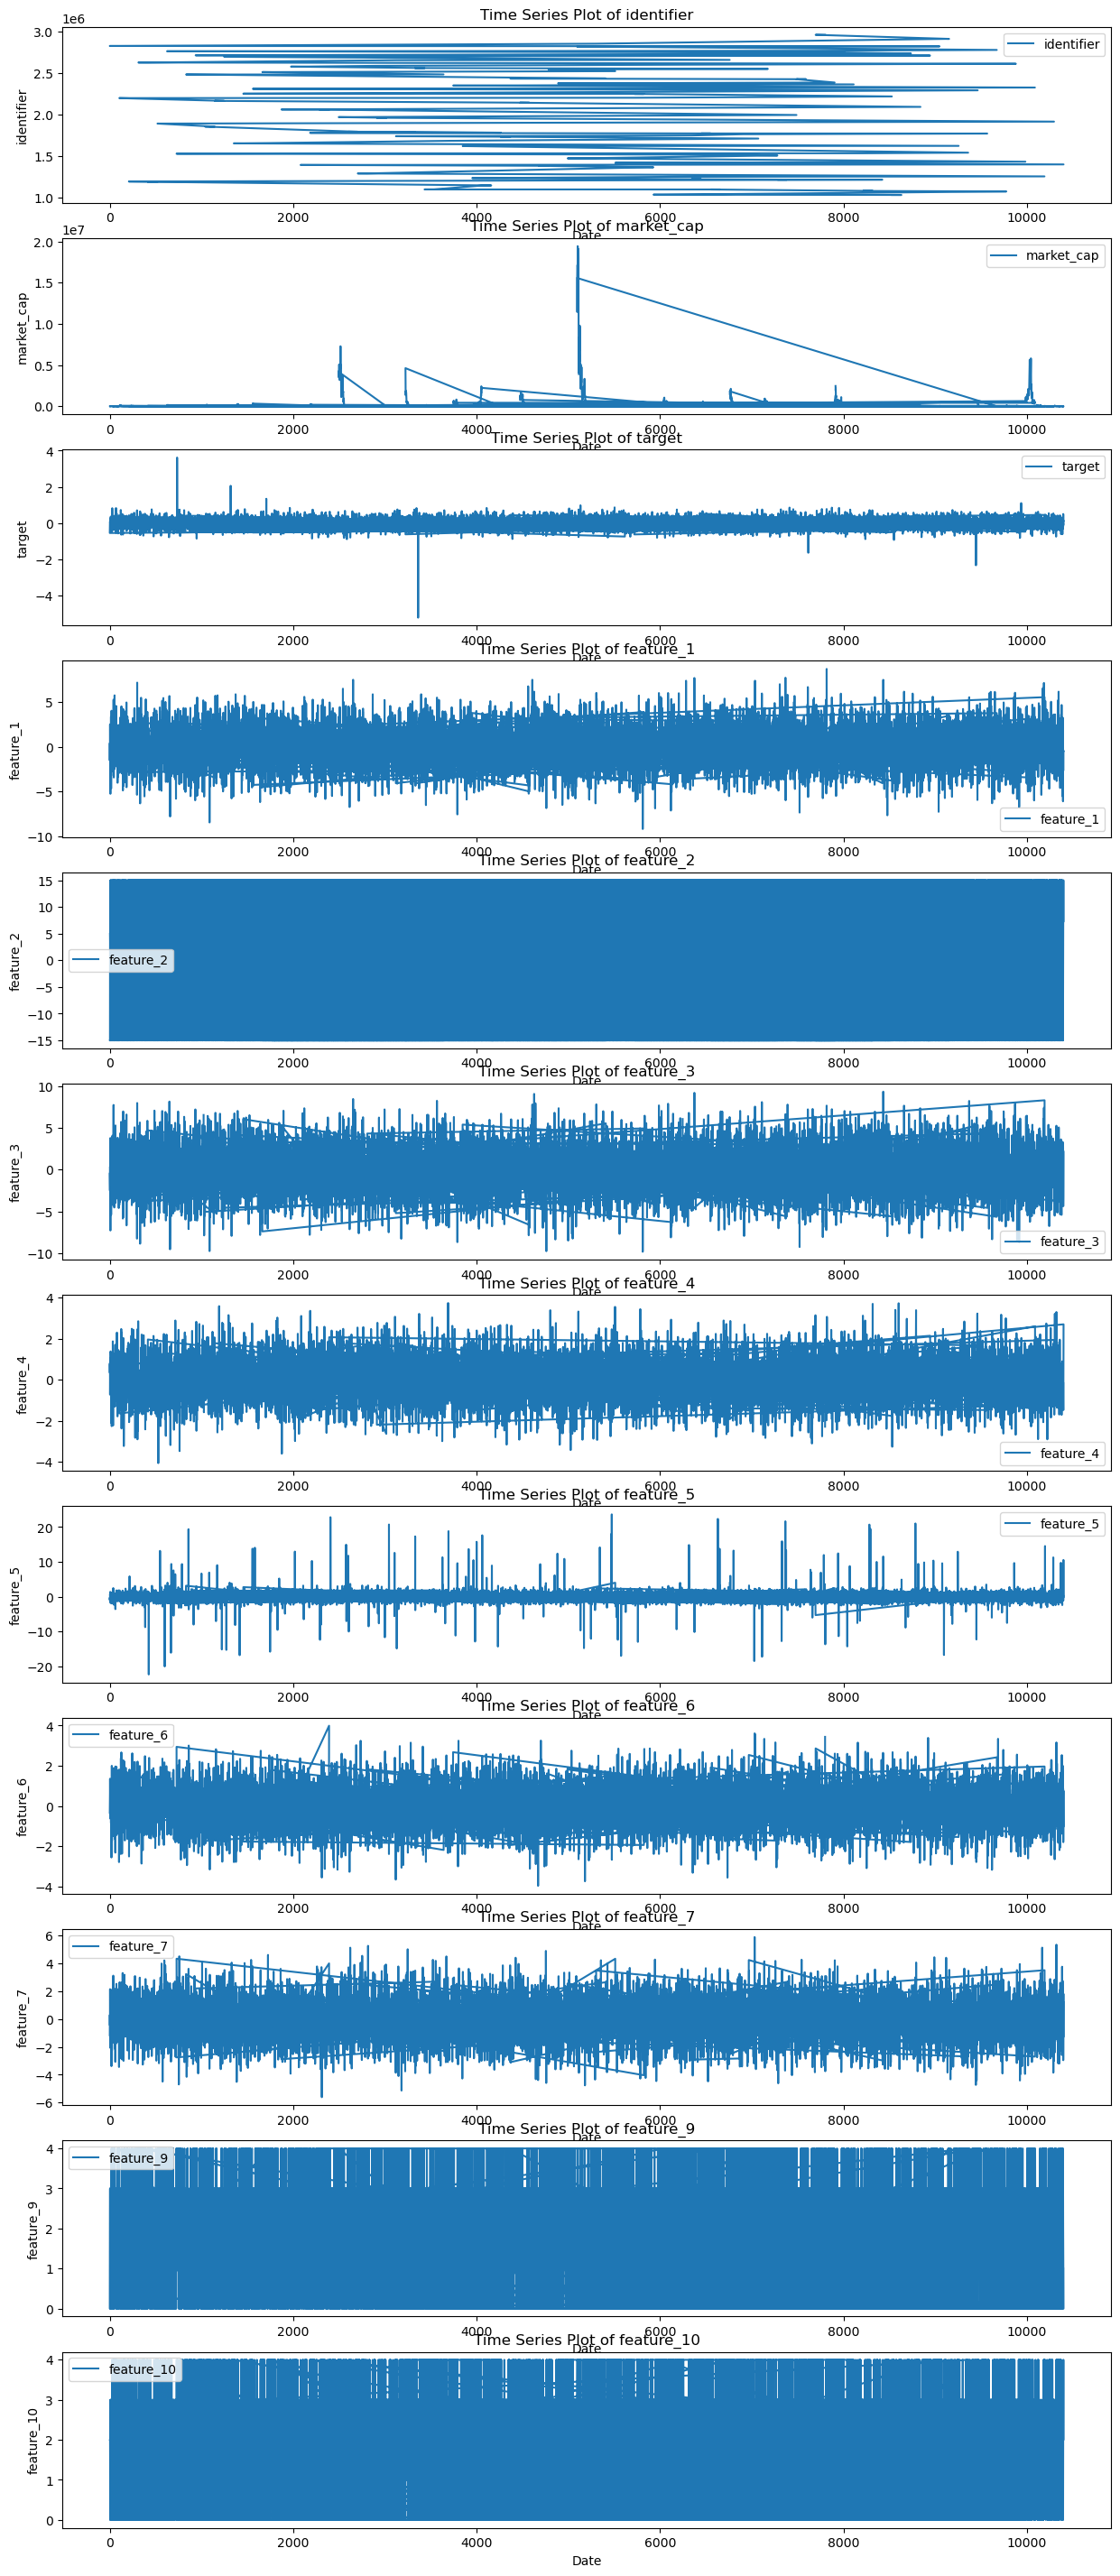

In [5]:
num_plots = len(data.select_dtypes(include=['number']).columns.tolist())
plt.figure(figsize=(15, num_plots * 3))
for i,feature in enumerate(data.select_dtypes(include=['number']).columns.tolist()):
    plt.subplot(num_plots, 1, i+1)
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
plt.show()

### Making sense of columns

In [6]:
stock_info_columns = ['identifier', 'sector', 'index_membership', 'market_cap']
target_column = ['target']
numeric_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7'] # numeric features
cat_features = ['feature_8']  # Categorical columns
num_cat_col = ['feature_9', 'feature_10']  # can be used as both numeric and categorical features
all_features = numeric_features + cat_features + num_cat_col

#### preliminary analysis of data shows, missing values in sector, market cap and feature 3 and infinte values in feature 2

## Handling missing data and infinte values

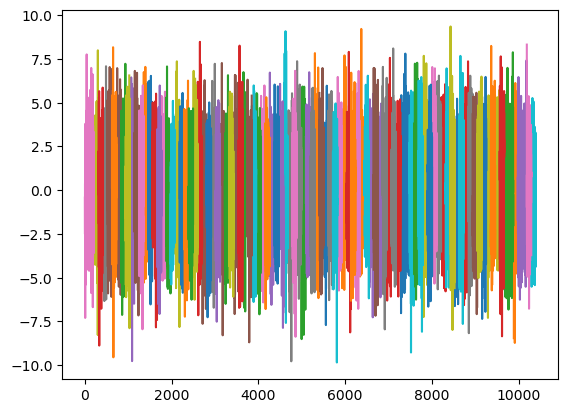

In [7]:
unique_identifiers = list(data['identifier'].unique())
data_l = []
for identifier in unique_identifiers:
    data_sub = data[data['identifier'] == identifier]
    data_sub['feature_3'].plot()
    data_sub.loc[:,'feature_3'] = data_sub['feature_3'].fillna(data_sub['feature_3'].mean()) #the feature_3 looks like white noise thus imputed using mean values
    data_sub.loc[:,'market_cap'] = data_sub['market_cap'].ffill() #the market_cap can be imputed using forward fill
    data_l.append(data_sub)
data = pd.concat(data_l)

In [8]:
#we cannot fill missing sector values
print(data.shape)
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

(10400, 16)
Missing Values:
 date                  0
identifier            0
sector              105
index_membership      0
market_cap            1
target                0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
feature_10            0
dtype: int64


In [9]:
data.loc[:,'market_cap'] = data['market_cap'].bfill() # to handle the one missing value in MCap
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date                  0
identifier            0
sector              105
index_membership      0
market_cap            0
target                0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
feature_10            0
dtype: int64


In [10]:
#feature_2 has infinite values in it
# Replace with the maximum finite value in the column
data['feature_2'].replace([np.inf], np.nan, inplace=True)
data['feature_2'].replace([np.nan], data['feature_2'].max().max(), inplace=True)
data['feature_2'].replace([-np.inf], np.nan, inplace=True)
data['feature_2'].replace([-np.nan], data['feature_2'].min().min(), inplace=True)
data.describe()

C:\Users\srava\AppData\Local\Temp\ipykernel_27604\2855928643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['feature_2'].replace([np.inf], np.nan, inplace=True)
C:\Users\srava\AppData\Local\Temp\ipykernel_27604\2855928643.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,identifier,market_cap,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,feature_10
count,1.040000e+04,1.040000e+04,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000,10400.000000
mean,2.000847e+06,1.207739e+05,-0.010341,0.009064,1.565855,-0.088236,0.010690,0.002453,-0.010852,-0.027490,1.767692,1.781346
std,5.618154e+05,7.877175e+05,0.266656,2.135567,12.777144,2.746105,1.001869,1.715926,0.999363,1.420963,1.314434,1.322604
min,1.032941e+06,6.344603e-02,-5.217926,-9.211656,-15.000000,-9.842327,-4.059085,-22.410842,-3.970612,-5.609781,0.000000,0.000000
25%,1.527076e+06,2.796811e+02,-0.181378,-1.429037,-15.000000,-1.977197,-0.675021,-0.714200,-0.674576,-0.961985,1.000000,1.000000
50%,1.989810e+06,2.297301e+03,-0.010092,0.018982,4.544429,-0.105719,0.009188,-0.020136,-0.007650,-0.035848,2.000000,2.000000
75%,2.516428e+06,1.876475e+04,0.159310,1.418567,15.000000,1.808125,0.686067,0.677270,0.658571,0.931238,3.000000,3.000000
max,2.962742e+06,1.943390e+07,3.620278,8.740757,15.000000,9.347031,3.732683,23.666757,3.993640,5.890090,4.000000,4.000000


### Visualization Plot

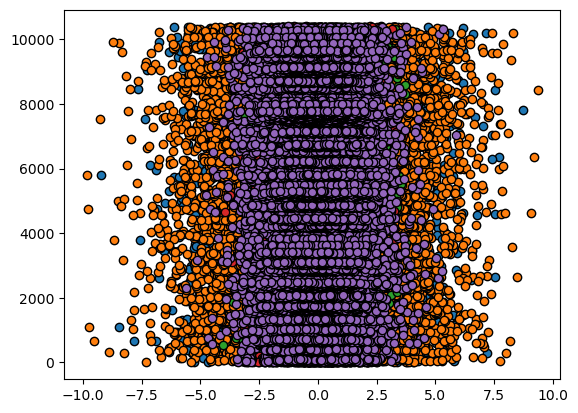

In [11]:
plt.scatter(data.loc[:,'feature_1'], data.index, edgecolors=(0, 0, 0))  
plt.scatter(data.loc[:,'feature_3'], data.index, edgecolors=(0, 0, 0)) 
# plt.scatter(data.loc[:,'feature_2'], residuals, edgecolors=(0, 0, 0))  
plt.scatter(data.loc[:,'feature_4'], data.index, edgecolors=(0, 0, 0))  
plt.scatter(data.loc[:,'feature_6'], data.index, edgecolors=(0, 0, 0)) 
# plt.scatter(data.loc[:,'feature_5'], residuals, edgecolors=(0, 0, 0))  
plt.scatter(data.loc[:,'feature_7'], data.index, edgecolors=(0, 0, 0))  
# plt.scatter(data.loc[:,'feature_8_True'], residuals, edgecolors=(0, 0, 0))  
# plt.scatter(data.loc[:,'feature_9'], residuals, edgecolors=(0, 0, 0))  
# plt.scatter(data.loc[:,'feature_10'], residuals, edgecolors=(0, 0, 0)) 

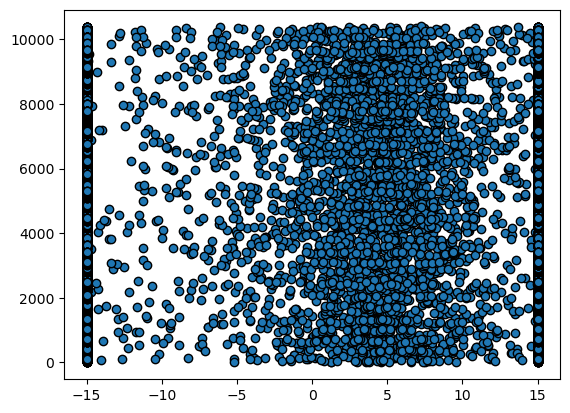

In [12]:
plt.scatter(data.loc[:,'feature_2'], data.index, edgecolors=(0, 0, 0))  

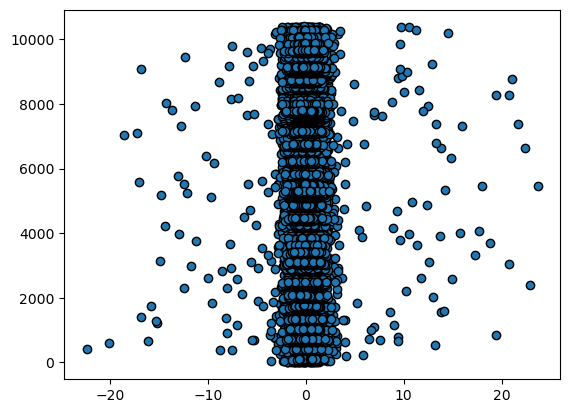

In [13]:
plt.scatter(data.loc[:,'feature_5'], data.index, edgecolors=(0, 0, 0))  

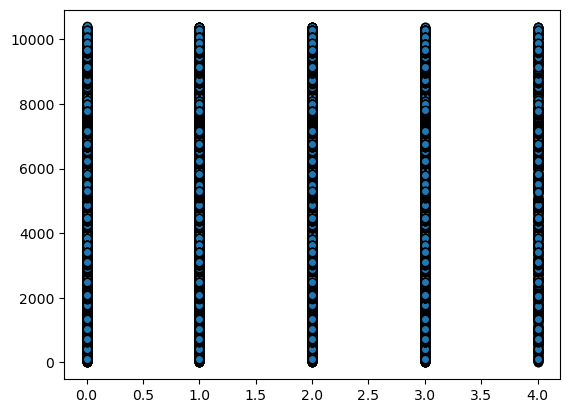

In [14]:
plt.scatter(data.loc[:,'feature_9'], data.index, edgecolors=(0, 0, 0))  

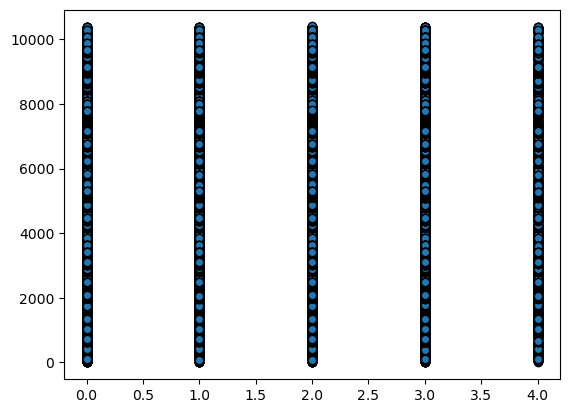

In [15]:
plt.scatter(data.loc[:,'feature_10'], data.index, edgecolors=(0, 0, 0))  

#### Due to lack of information on feature 2 and 5 , i am not applying any log transformation or outlier handling in them

C:\Users\srava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


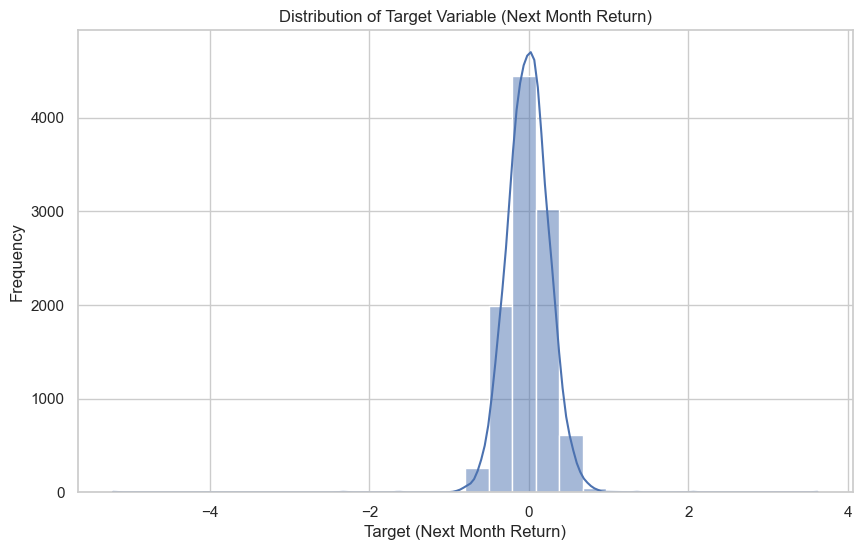

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['target'], kde=True, bins=30)
plt.title('Distribution of Target Variable (Next Month Return)')
plt.xlabel('Target (Next Month Return)')
plt.ylabel('Frequency')
plt.show()

#### The Target variable is normally distributed

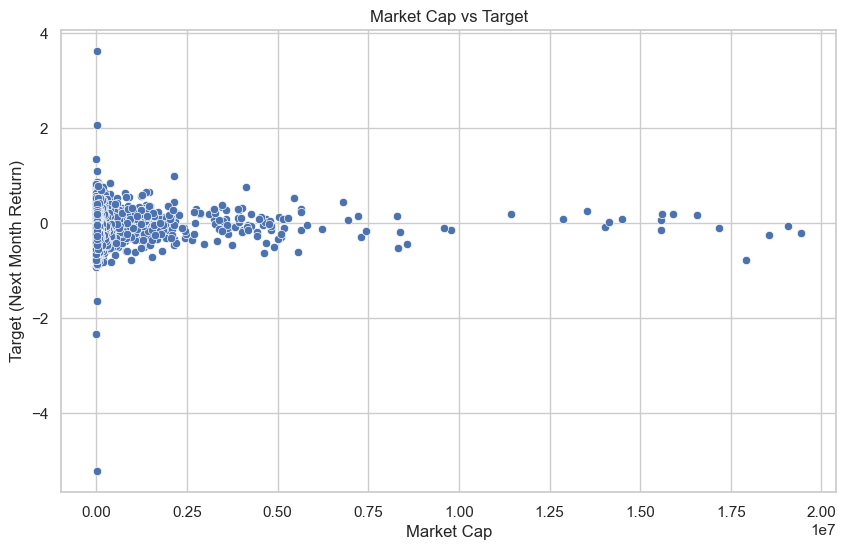

In [17]:
# Visualize the relationship between market_cap and target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_cap', y='target', data=data)
plt.title('Market Cap vs Target')
plt.xlabel('Market Cap')
plt.ylabel('Target (Next Month Return)')
plt.show()

#### The target variable which is aggregate return seems to be more spread out for smaller cap stocks, maybe its just due to more number of stocks with lower Mcap

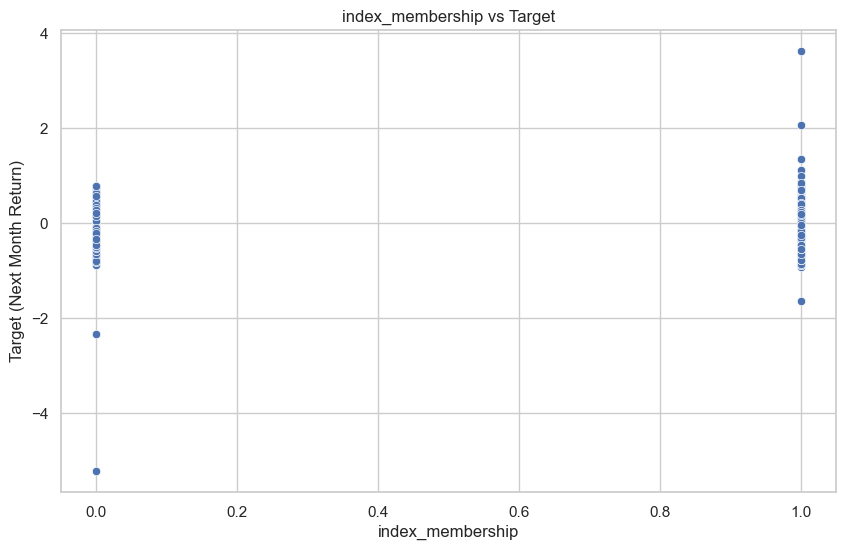

In [18]:
# Visualize the relationship between market_cap and target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='index_membership', y='target', data=data)
plt.title('index_membership vs Target')
plt.xlabel('index_membership')
plt.ylabel('Target (Next Month Return)')
plt.show()

#### no relation between index memebrship and target variable as the target returns seem to be same in either case

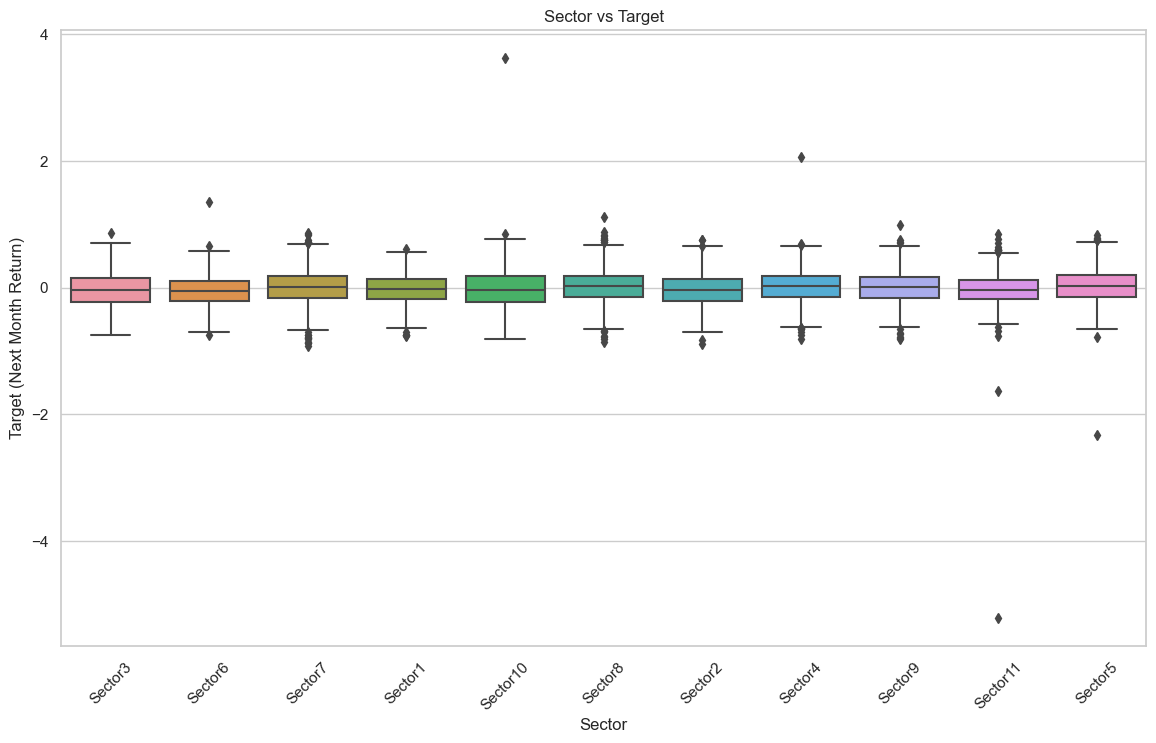

In [19]:
# Visualize the relationship between sector and target
plt.figure(figsize=(14, 8))
sns.boxplot(x='sector', y='target', data=data)
plt.title('Sector vs Target')
plt.xlabel('Sector')
plt.ylabel('Target (Next Month Return)')
plt.xticks(rotation=45)
plt.show()

#### The returns spread for each sector seems to be similar, except for few sectors where there are more outliers.

Observation of Central Tendency: The box plots show that the median returns (the central line within each box) are fairly close to zero across all sectors, indicating that the average next month's returns are typically small.

Variability Across Sectors: The interquartile range (IQR) appears similar across sectors, suggesting that the variability in returns is consistent across different sectors.

Outliers: Several sectors exhibit outliers, with returns significantly deviating from the majority. These outliers might represent unusual market events or sector-specific shocks.

Sector Comparisons: The box plot allows for comparison across sectors, indicating that no sector has significantly higher or lower average returns compared to others, but some sectors might have more outliers or variability.

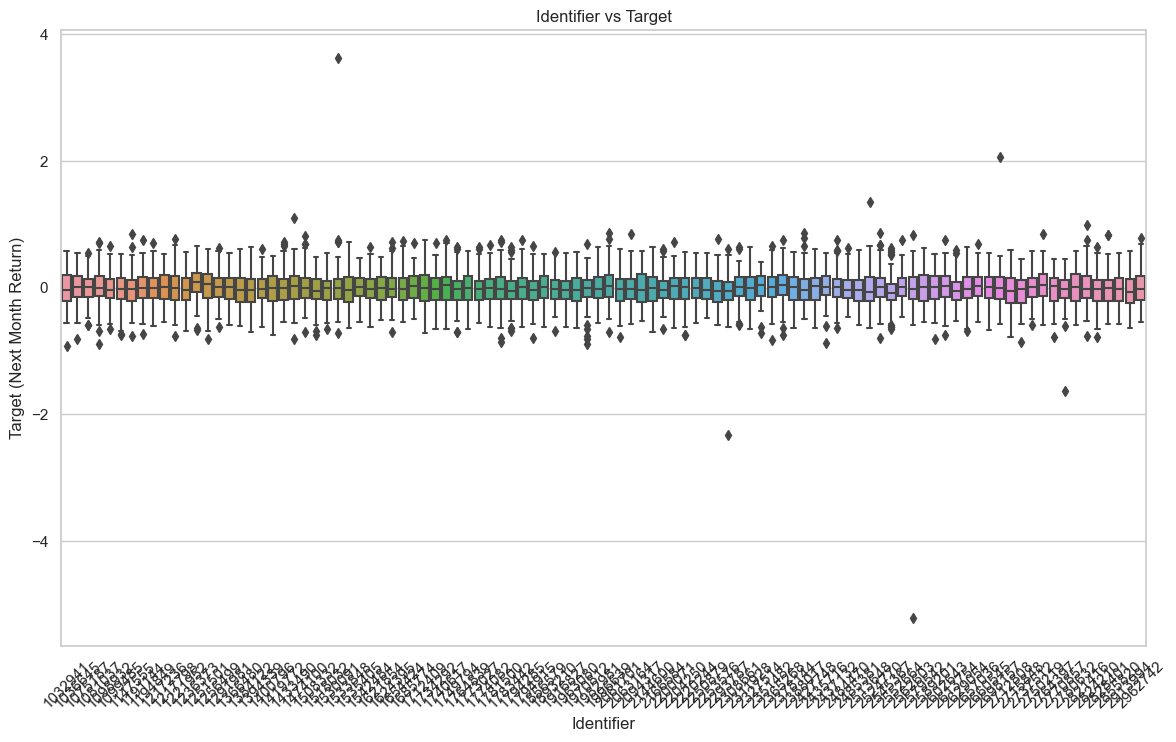

In [20]:
# Visualize the relationship between indeitifer and target
plt.figure(figsize=(14, 8))
sns.boxplot(x='identifier', y='target', data=data)
plt.title('Identifier vs Target')
plt.xlabel('Identifier')
plt.ylabel('Target (Next Month Return)')
plt.xticks(rotation=45)
plt.show()

identifier
1032941    Axes(0.125,0.11;0.775x0.77)
1036645    Axes(0.125,0.11;0.775x0.77)
1075187    Axes(0.125,0.11;0.775x0.77)
1081037    Axes(0.125,0.11;0.775x0.77)
1098932    Axes(0.125,0.11;0.775x0.77)
                      ...             
2824210    Axes(0.125,0.11;0.775x0.77)
2828401    Axes(0.125,0.11;0.775x0.77)
2855820    Axes(0.125,0.11;0.775x0.77)
2913994    Axes(0.125,0.11;0.775x0.77)
2962742    Axes(0.125,0.11;0.775x0.77)
Name: target, Length: 100, dtype: object

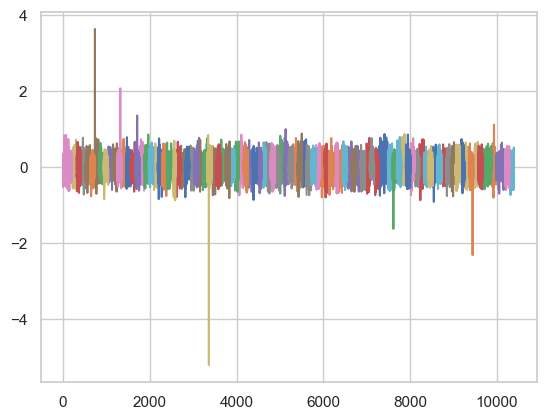

In [21]:
# Apply the function to each idientifier
data.groupby('identifier')['target'].plot()

## Handling Outliers

In [22]:
# Function to calculate outliers based on IQR
def calculate_outliers(group):
    Q1 = group['target'].quantile(0.25)
    Q3 = group['target'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['target'] < lower_bound) | (group['target'] > upper_bound)]
    return len(outliers), len(group)


outlier_stats = data.groupby('identifier').apply(calculate_outliers)
outlier_stats = pd.DataFrame(outlier_stats.tolist(), index=outlier_stats.index, columns=['num_outliers', 'total_points'])

# Calculate the proportion of outliers
outlier_stats['proportion_of_outliers'] = outlier_stats['num_outliers'] / outlier_stats['total_points']
print(outlier_stats['proportion_of_outliers'].describe())

count    100.000000
mean       0.014904
std        0.015485
min        0.000000
25%        0.000000
50%        0.009615
75%        0.019231
max        0.086538
Name: proportion_of_outliers, dtype: float64


C:\Users\srava\AppData\Local\Temp\ipykernel_27604\4211390973.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outlier_stats = data.groupby('identifier').apply(calculate_outliers)


1.4% mean seems high as per above plot for outliers, lets try Z-score

In [23]:
# Calculate Z-scores for the 'target' column within each sector
data['z_score'] = data.groupby('sector')['target'].transform(lambda x: stats.zscore(x))

# Define a threshold for Z-score to identify outliers
threshold = 3

# Filter the DataFrame to remove outliers
df_no_outliers = data[(data['z_score'] > -threshold) & (data['z_score'] < threshold)]

# Drop the Z-score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['z_score'])
print(len(data))
print(len(df_no_outliers))
print("Percentage outliers",100*(len(data) - len(df_no_outliers))/len(data))

10400
10260
Percentage outliers 1.3461538461538463


Outlier Treatment:

Sectors with significant outliers around 1.35%, this also seems high,  lets check for stock wise outliers

In [24]:
# Calculate Z-scores for the 'target' column within each sector
data['z_score'] = data.groupby('identifier')['target'].transform(lambda x: stats.zscore(x))

# Define a threshold for Z-score to identify outliers
threshold = 3

# Filter the DataFrame to remove outliers
df_no_outliers = data[(data['z_score'] > -threshold) & (data['z_score'] < threshold)]

# Drop the Z-score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['z_score'])
print(len(data))
print(len(df_no_outliers))
print("Percentage outliers",100*(len(data) - len(df_no_outliers))/len(data))

10400
10369
Percentage outliers 0.2980769230769231


In [25]:
#remove the 0.29% outliers around 31 rows removed
data = df_no_outliers.copy()

## Correlation

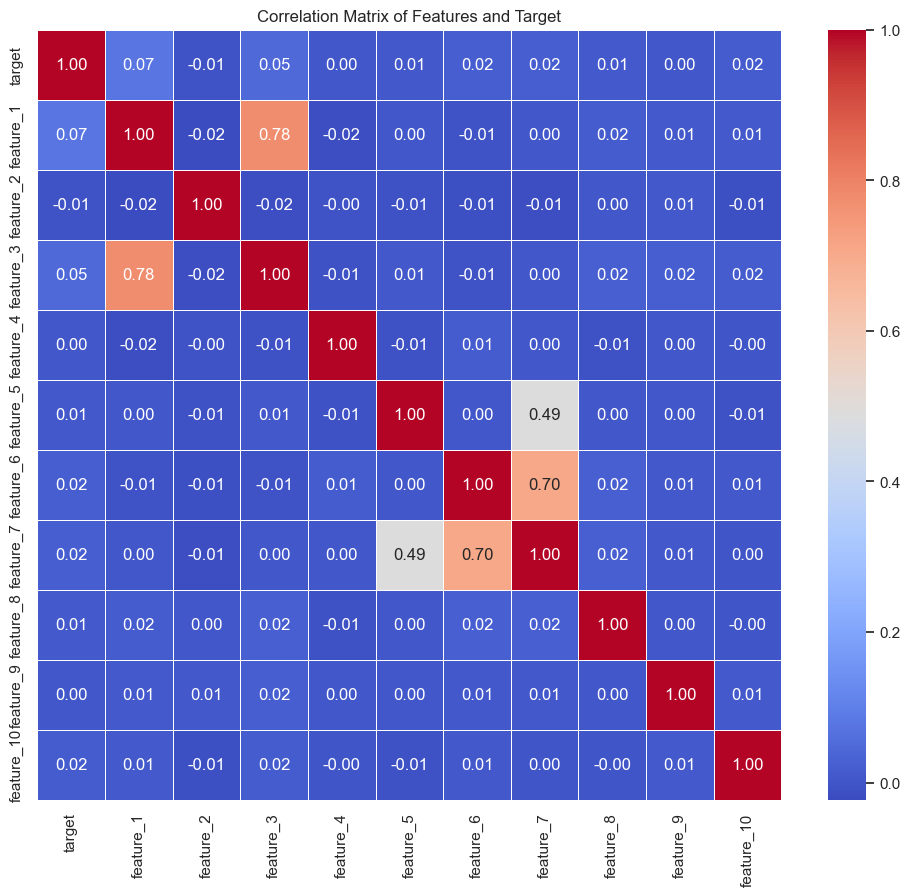

In [26]:
# Visualize the correlation matrix of the features and the target variable
plt.figure(figsize=(12, 10))
corr_matrix = data[target_column + all_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Target')
plt.show()


#### there seems to be high correlation between feature 1 and feature 3,   featre 5 and feature 7, feature 6 and feature 7 which signifies multicollinearity in features

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'X' is your dataframe with features
X = data[numeric_features+num_cat_col]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

[2.516238311424426, 1.0122589266231834, 2.5157812554086036, 1.000793251076832, 1.9080076216459718, 2.8710354117608996, 3.7884018215980655, 1.732297134003747, 1.7288353226460467]


#### VIF numbers show moderate multicollinearity
High correlation between variables with moderate VIF suggests that while there is some redundancy between specific pairs of variables, it does not severely impact the model as a whole. You can often retain both variables, especially if VIF is moderate, but consider model's performance to ensure that multicollinearity isn’t negatively affecting your results.

#### Given the low direct correlation between features and the target, it might be beneficial to engineer new features that could better capture the underlying patterns or interactions in the data.

## Feature Engineering

In [28]:
data_n = data.copy()
data_n.columns

Index(['date', 'identifier', 'sector', 'index_membership', 'market_cap',
       'target', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10'],
      dtype='object')

In [29]:
data_n= pd.get_dummies(data_n, columns=['index_membership', 'feature_8'], dtype=int, drop_first=True)

a) Adding lagged variables

In [30]:
#lagged feature variables
for feature in numeric_features + num_cat_col:
    data_n[f'{feature}_lag1'] = data_n[feature].shift(1)
    data_n[f'{feature}_lag2'] = data_n[feature].shift(2)
    data_n[f'{feature}_lag3'] = data_n[feature].shift(3)
    data_n[f'{feature}_lag4'] = data_n[feature].shift(4)
    data_n[f'{feature}_lag5'] = data_n[feature].shift(5)
    data_n[f'{feature}_lag6'] = data_n[feature].shift(6)
    data_n[f'{feature}_lag7'] = data_n[feature].shift(7)
    data_n[f'{feature}_lag8'] = data_n[feature].shift(8)
    data_n[f'{feature}_lag9'] = data_n[feature].shift(9)
    data_n[f'{feature}_lag10'] = data_n[feature].shift(10)
    data_n[f'{feature}_lag11'] = data_n[feature].shift(11)
    data_n[f'{feature}_lag12'] = data_n[feature].shift(12)
data_n.shape

C:\Users\srava\AppData\Local\Temp\ipykernel_27604\1395728978.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_n[f'{feature}_lag12'] = data_n[feature].shift(12)
C:\Users\srava\AppData\Local\Temp\ipykernel_27604\1395728978.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_n[f'{feature}_lag1'] = data_n[feature].shift(1)
C:\Users\srava\AppData\Local\Temp\ipykernel_27604\1395728978.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

(10369, 124)

b) Adding Sector returns

In [31]:
sr = data.groupby(['date', 'sector'])['target'].mean().reset_index().rename(columns={'target':'SR'})
data_n = pd.merge(data_n, sr, on=['date', 'sector'], how='left')
data_n.shape

(10369, 125)

c) Rolling Window Features : Compute rolling means, standard deviations, or other statistics over a window of past values. This can smooth out noise and highlight trends or patterns over time

In [32]:
window_size = 5  # Example window size
for feature in numeric_features + num_cat_col:
    data_n[f'{feature}_rolling_mean'] = data_n[feature].rolling(window=window_size).mean()
    data_n[f'{feature}_rolling_std'] = data_n[feature].rolling(window=window_size).std()
data_n.shape

(10369, 143)

d) Interaction Features: Create new features by interacting numeric features with each other or with the categorical feature. This can help uncover hidden relationships.

In [33]:
for feature1 in numeric_features:
    for feature2 in numeric_features:
        if feature1 != feature2:
            data_n[f'{feature1}_{feature2}_interaction'] = data_n[feature1] * data_n[feature2]

# data_n = pd.get_dummies(data_n, columns=cat_features)

# for feature in numeric_features + num_cat_col:
#     for cat_feature in cat_features:
#         data_n[f'{feature}_{cat_feature}_interaction'] = data_n[feature] * data_n[cat_feature]

e) Polynomial Features

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(data_n[numeric_features + num_cat_col])
poly_feature_names = poly.get_feature_names_out(numeric_features + num_cat_col)
data_n_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
data_n = pd.concat([data_n, data_n_poly], axis=1)
data_n = data_n.loc[:,~data_n.columns.duplicated()]
data_n.shape

(10369, 395)

f) Date/Time Features

In [35]:
data_n['date'] = pd.to_datetime(data_n['date'])
data_n.set_index('date', inplace=True)
data_n['month'] = data_n.index.month
data_n['year'] = data_n.index.year

Checking correlations of the new features now

In [36]:
cols = data_n.columns
corrs = data_n[['target'] + [i for i in cols if 'feature' in i]].corr()['target']

In [37]:
decent_correlation_features = list(corrs[abs(corrs) > 0.02].drop_duplicates().index)

In [38]:
len(decent_correlation_features)

46

In [39]:
decent_correlation_features

['target',
 'feature_1',
 'feature_3',
 'feature_6',
 'feature_7',
 'feature_3_lag4',
 'feature_5_lag3',
 'feature_5_lag10',
 'feature_6_lag2',
 'feature_7_lag10',
 'feature_1_rolling_mean',
 'feature_3_rolling_mean',
 'feature_1 feature_9',
 'feature_1 feature_10',
 'feature_2^2',
 'feature_3 feature_9',
 'feature_3 feature_10',
 'feature_5^2',
 'feature_1^3',
 'feature_1^2 feature_3',
 'feature_1^2 feature_6',
 'feature_1^2 feature_7',
 'feature_1 feature_2^2',
 'feature_1 feature_3^2',
 'feature_1 feature_3 feature_6',
 'feature_1 feature_3 feature_7',
 'feature_1 feature_4^2',
 'feature_1 feature_5 feature_7',
 'feature_1 feature_6^2',
 'feature_1 feature_6 feature_7',
 'feature_1 feature_7^2',
 'feature_1 feature_9^2',
 'feature_1 feature_9 feature_10',
 'feature_1 feature_10^2',
 'feature_2^2 feature_3',
 'feature_2^2 feature_7',
 'feature_2^2 feature_10',
 'feature_3^3',
 'feature_3^2 feature_6',
 'feature_3^2 feature_7',
 'feature_3 feature_4^2',
 'feature_3 feature_5 feature_7

Further filter feature importance using Lasso

In [40]:
from sklearn.linear_model import Lasso

X = data_n[decent_correlation_features].drop(columns = 'target').ffill().bfill()
y = data_n['target']
model = Lasso(alpha=0.1)
model.fit(X , y)

# Get the coefficients
lasso_selected_features = [feature for feature, coef in zip(X.columns, model.coef_) if coef != 0]
print("Selected Features:", lasso_selected_features)

Selected Features: ['feature_2^2', 'feature_5^2', 'feature_1^3', 'feature_1 feature_2^2', 'feature_1 feature_9^2', 'feature_1 feature_10^2', 'feature_2^2 feature_3', 'feature_2^2 feature_7', 'feature_2^2 feature_10', 'feature_3^3', 'feature_4 feature_5^2']


Do feature selection using random forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
rf_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
rf_feature_importances = rf_feature_importances.sort_values(by='importance', ascending=False)


In [42]:
rf_selected_features = rf_feature_importances[rf_feature_importances['importance']>0.03]['feature'].to_list()

In [43]:
selected_features_prelim = list(set(lasso_selected_features).union(set(rf_selected_features)))
selected_features_prelim

['feature_1_rolling_mean',
 'feature_1 feature_10^2',
 'feature_1 feature_2^2',
 'feature_2^2',
 'feature_5_lag10',
 'feature_3_lag4',
 'feature_7_lag10',
 'feature_1^3',
 'feature_2^2 feature_3',
 'feature_1 feature_9^2',
 'feature_5_lag3',
 'feature_6_lag2',
 'feature_3_rolling_mean',
 'feature_2^2 feature_10',
 'feature_4 feature_5^2',
 'feature_3^3',
 'feature_1 feature_4^2',
 'feature_2^2 feature_7',
 'feature_5^2']

In [44]:
features_with_original_ones = list(set(selected_features_prelim).union(set(all_features)).union(['feature_8_True']).difference(['feature_8']))

In [45]:
len(features_with_original_ones)

29

### Stationarity checks for target variable

In [53]:
#remove the 0.29% outliers around 31 rows removed
data_ts = df_no_outliers.copy()

In [54]:
def adf_test(series, signif=0.05, name='', verbose=False):
    """
    Perform ADF test and return the result with interpretation.
    
    series: The time series to be tested
    signif: The significance level for the test (default is 0.05)
    name: The name of the series (for reporting)
    verbose: Whether to print the detailed results
    
    Returns: 
    A dictionary with the results of the test.
    """
    r = adfuller(series, autolag='AIC')
    output = {'Test Statistic': r[0], 'p-value': r[1], '#Lags Used': r[2], 'Number of Observations Used': r[3],
              'Critical Value (1%)': r[4]['1%'], 'Critical Value (5%)': r[4]['5%'], 'Critical Value (10%)': r[4]['10%']}
    
    if verbose:
        print(f'ADF Test for {name}')
        print('Test Statistic:', r[0])
        print('p-value:', r[1])
        print('#Lags Used:', r[2])
        print('Number of Observations Used:', r[3])
        print('Critical Values:', r[4])
        print('Stationarity Status:', 'Stationary' if r[1] <= signif else 'Non-Stationary')
    
    return output


In [55]:
# Run ADF test on each feature and the target
adf_results = {}
data_per_stock = {}
for identifier in unique_identifiers:
    data_sub = data_ts[data_ts['identifier'] == identifier].set_index('date')
    results = {}
    for column in target_column:
        result = adf_test(data_sub[column], name=column, verbose=False)
        results[column] = result
        if result['p-value'] > 0.01:
            print("Non stationairty detected for columns {} identifier {}".format(column, identifier))
            if identifier not in adf_results:
                adf_results[identifier] = [column]
            else:
                adf_results[identifier].append(column)
        
    data_per_stock[identifier] = data_sub
    
    
# from pprint import pprint
# print(f"ADF Test Results for Stationarity Check:")
# pprint(results, sort_dicts=False)

Non stationairty detected for columns target identifier 2378144
Non stationairty detected for columns target identifier 2657036


In [56]:
df = data_per_stock[2657036]

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(df['target'], model='additive', period=36)
# Remove trend and seasonality
df['target_detrended'] = df['target'] - decomposition.trend
df['target_deseasonalized'] = df['target_detrended'] - decomposition.seasonal

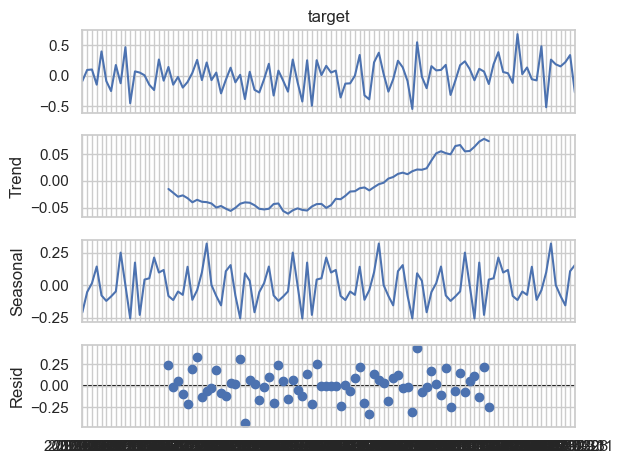

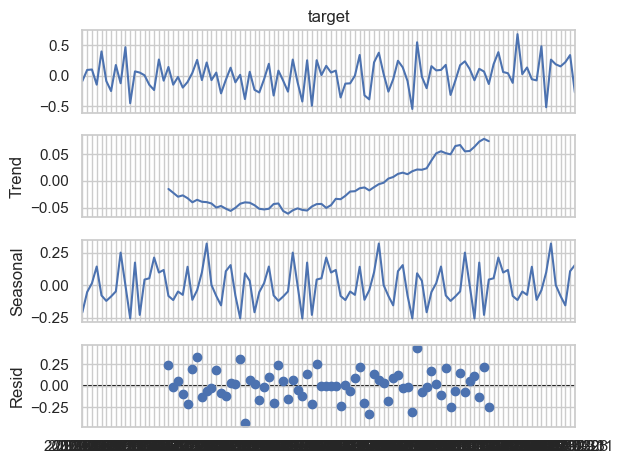

In [58]:
decomposition.plot()

<Axes: xlabel='date'>

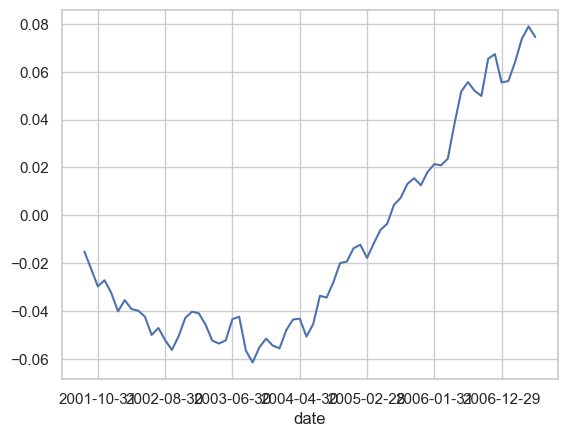

In [59]:
decomposition.trend.plot()

<Axes: xlabel='date'>

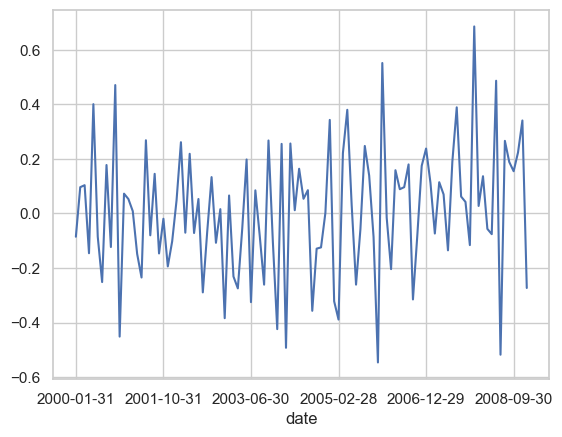

In [61]:
df['target'].plot()

<Axes: xlabel='date'>

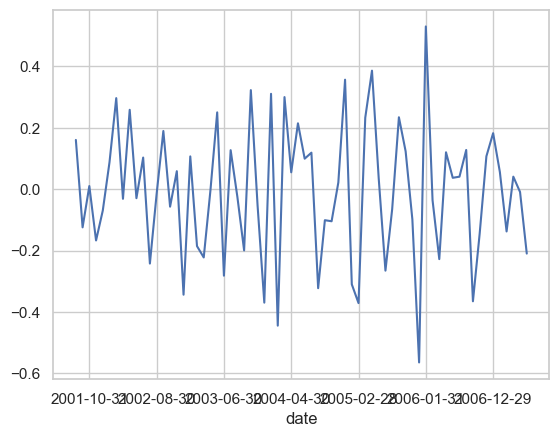

In [62]:
df['target_detrended'].plot()

In [64]:
adf_test(df['target'], name='target', verbose=False)

{'Test Statistic': -1.2558698226568774,
 'p-value': 0.6491125110068208,
 '#Lags Used': 8,
 'Number of Observations Used': 95,
 'Critical Value (1%)': -3.5011373281819504,
 'Critical Value (5%)': -2.8924800524857854,
 'Critical Value (10%)': -2.5832749307479226}

In [65]:
adf_test(df['target_detrended'].dropna(), name='target_detrended', verbose=False)

{'Test Statistic': -5.9919310595247515,
 'p-value': 1.7373663091018457e-07,
 '#Lags Used': 3,
 'Number of Observations Used': 64,
 'Critical Value (1%)': -3.53692771987915,
 'Critical Value (5%)': -2.907887369384766,
 'Critical Value (10%)': -2.591493291015625}

### Check if there is lagged dependence using ACF, PACF

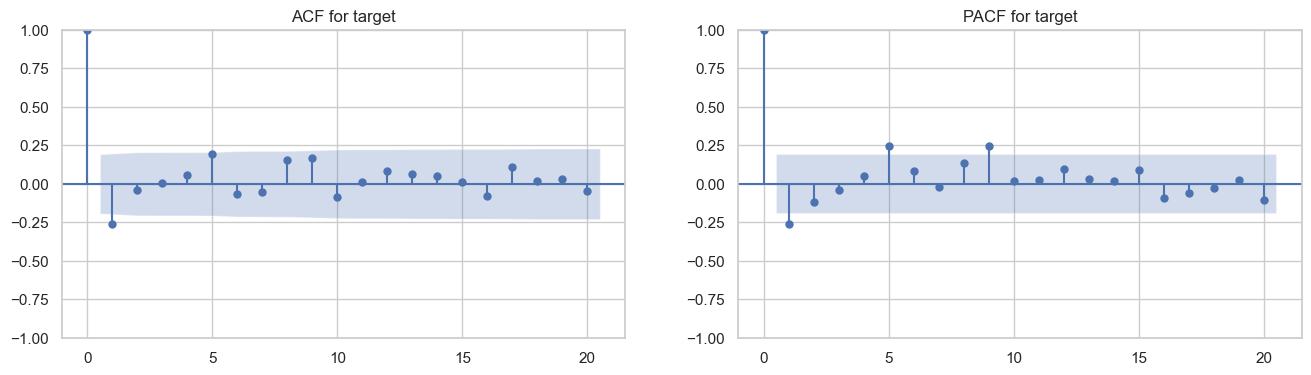

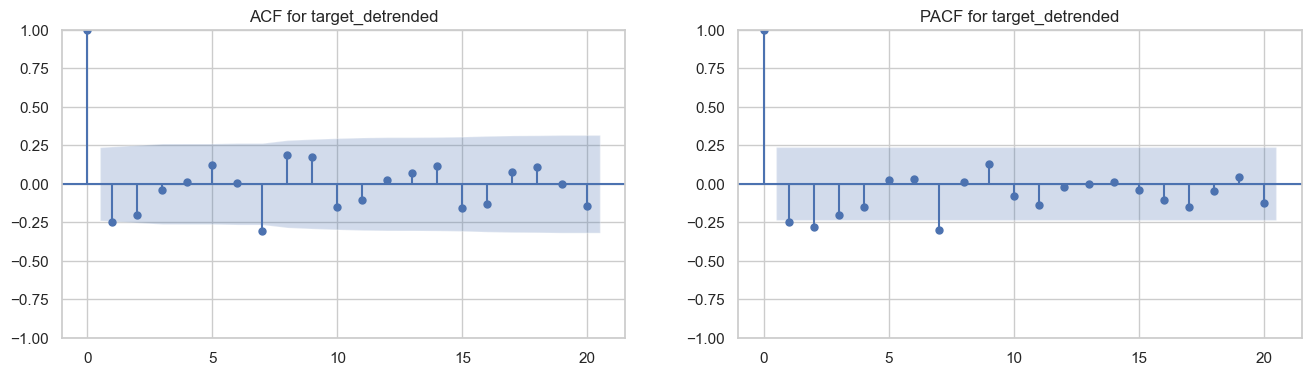

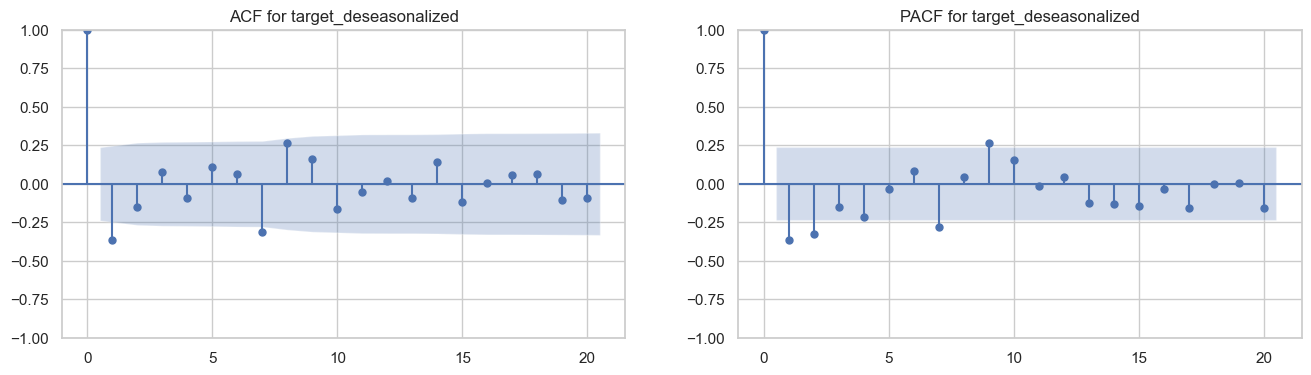

In [66]:

# Plot ACF and PACF for each column
for column in ['target','target_detrended','target_deseasonalized']:
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    # ACF plot
    plot_acf(df[column].dropna(), lags=20, ax=axes[0])
    axes[0].set_title(f'ACF for {column}')

    # PACF plot
    plot_pacf(df[column].dropna(), lags=20, ax=axes[1], method='ywm')
    axes[1].set_title(f'PACF for {column}')

    plt.show()


### Model Development

### Trying time Series modelling of stocks

In [70]:
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [71]:
def apply_forecasting_and_evaluate(data_per_stock):
    results = []

    # Iterate over each stock in the dataset
    for identifier in unique_identifiers:
        stock_data = data_per_stock[identifier]['target'].dropna()
        
        # Split into training and testing sets
        train = stock_data[stock_data.index < '2006-01-01']
        test = stock_data[(stock_data.index >= '2006-01-01') & (stock_data.index <= '2008-12-31')]
        
        model = pm.auto_arima(train, 
                              start_p=1, start_q=1,
                              test='adf',
                              max_p=5, max_q=5,  
                              m=1,  # Non-seasonal
                              seasonal=False,
                              d=None, trace=False,
                              trend='ct',  # 'ct' includes a constant and a linear trend
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

        # Forecast the test set
        n_periods = len(test)
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        fc_series = pd.Series(fc, index=test.index).fillna(0.0)
        # Compute evaluation metrics
        mae = mean_absolute_error(test, fc_series)
        rmse = np.sqrt(mean_squared_error(test, fc_series))
        r2 = r2_score(test, fc_series)

        # Append the results
        results.append({
            'stock_id': identifier,
            'mae': mae,
            'rmse': rmse,
            'r_squared': r2
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [72]:
# Assuming df is your DataFrame with 'stock_id', 'Date', and 'Value' columns
results_df = apply_forecasting_and_evaluate(data_per_stock)

# Display the results
print(results_df)


C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

    stock_id       mae      rmse  r_squared
0    1032941  0.192993  0.237155  -0.020620
1    1036645  0.195217  0.232439  -0.195624
2    1075187  0.194386  0.232940  -0.004251
3    1081037  0.229790  0.297566  -0.000762
4    1098932  0.186167  0.251105  -0.003501
..       ...       ...       ...        ...
95   2824210  0.196416  0.239181  -0.025376
96   2828401  0.195597  0.234658  -0.000007
97   2855820  0.226888  0.280056  -0.005918
98   2913994  0.211033  0.253705  -0.006492
99   2962742  0.157632  0.206125  -0.000979

[100 rows x 4 columns]


C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\srava\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
results_df.describe()

,stock_id,mae,rmse,r_squared
count,1.000000e+02,100.000000,100.000000,100.000000
mean,2.000847e+06,0.198087,0.245717,-0.033636
std,5.646185e+05,0.022619,0.027023,0.048832
min,1.032941e+06,0.145017,0.180233,-0.274195
25%,1.527076e+06,0.185082,0.226862,-0.042179
50%,1.989810e+06,0.198448,0.245048,-0.013478
75%,2.516428e+06,0.209433,0.259943,-0.003493
max,2.962742e+06,0.279303,0.334664,-0.000007


##### time series prediction results are not great

## Model data as one large panel data using machine learning

Things to consider based on exploratory analysis of data before choosing a model:

1) Consider using models that are robust to multicollinearity, such as tree-based models (Random Forest, Gradient Boosting).
2) Given the low correlation of features with the target, non-linear models such as Random Forest, Gradient Boosting Machines, or even neural networks may be more suitable.


a) Based on above we can conclude that we choose a non linear model to account for multicollinearity in independent variables and also low correlation of features with target
b) Also skipping feature selection as we have a small number of features (e.g., less than 10), feature selection might not provide much benefit. Also in non-Linear models like Random Forests or GBM that are less sensitive to irrelevant features, feature selection is less critical. (Yet to explore feature engineering)

#### Final justification for choosing Random Forest or XG boost is 

##### Implications for Model Development: The low correlation with the target suggests that more complex models, possibly non-linear ones, might be needed to capture the relationships between the features and the target.
##### Given moderate  multicollinearity and low correlation with the target, the best model is a non linear model like Randon Forest , Gradient Boosting Machines
##### Also random forest can effective handle outliers, apart from the ones already removed

In [77]:
# # Convert 'date' to datetime and set it as the index
# data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [84]:
# Split the data into features (X) and target (y)
# X = data[stock_info_columns + all_features]
# # Apply Label Encoding
# encoder = LabelEncoder()
# X['sector_encoded'] = encoder.fit_transform(X['sector'])
# X = X.drop(columns=['sector'])
# X['identifier_encoded'] = encoder.fit_transform(X['identifier'])
# X = X.drop(columns=['identifier'])
# print(X)
X = data_n[features_with_original_ones].ffill().bfill()
y = data_n['target']

# Assume X contains relevant features; for simplicity, let's create a dummy feature set
X['month'] = X.index.month
X['year'] = X.index.year

# Split the data into training (before 2006) and testing (2006-2008) sets
X_train = X[X.index < '2006-01-01']
X_test = X[(X.index >= '2006-01-01') & (X.index <= '2008-12-31')]

y_train = y[y.index < '2006-01-01']
y_test = y[(y.index >= '2006-01-01') & (y.index <= '2008-12-31')]


### Naive Benchmark to beat

Below is the performance of benchmark model which just predicts the previous date return, our model should perform better than this

In [85]:
data['Naive_Prediction'] = data.groupby('identifier')['target'].shift(1)

dn = data.loc[y_test.index.unique()]
print(dn.shape)
# Evaluate the performance on the test set
mae = mean_absolute_error(dn['target'], dn['Naive_Prediction'])
rmse = np.sqrt(mean_squared_error(dn['target'], dn['Naive_Prediction']))

r2 = r2_score(dn['target'], dn['Naive_Prediction'])
print(f'R-squared (R²): {r2}')

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


(3392, 16)
R-squared (R²): -1.0693177466090926
Mean Absolute Error (MAE): 0.2844937840977127
Root Mean Squared Error (RMSE): 0.3552588267271601


### OLS, LASSO, RIDGE

In [86]:
# Apply OLS (Linear Regression)
ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred_ols = ols.predict(X_test)

# Apply Lasso
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
lasso_coeffs = lasso.coef_

# Apply Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge_coeffs = ridge.coef_

# Apply Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
y_pred_en = elastic_net.predict(X_test)
en_coeffs = elastic_net.coef_

# Evaluate the models
results = {
    'Model': ['OLS', 'Lasso', 'Ridge', 'Elastic Net'],
    'R-squared': [
        r2_score(y_test, y_pred_ols),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_en)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_pred_ols),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_en)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_ols)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_en))
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

# Combine feature names with coefficients for Lasso, Ridge, and Elastic Net
coefficients_df = pd.DataFrame({
    'Lasso Coefficients': lasso_coeffs,
    'Ridge Coefficients': ridge_coeffs,
    'Elastic Net Coefficients': en_coeffs
}, index = X.columns)

print(coefficients_df)

         Model  R-squared       MAE      RMSE
0          OLS   0.010901  0.196351  0.245613
1        Lasso   0.011892  0.196742  0.245490
2        Ridge   0.010903  0.196351  0.245613
3  Elastic Net   0.013587  0.196568  0.245279
                        Lasso Coefficients  Ridge Coefficients  \
feature_2                     0.000000e+00            0.000057   
feature_8_True                0.000000e+00            0.004380   
feature_1_rolling_mean        0.000000e+00           -0.000549   
feature_1 feature_10^2        5.539176e-04            0.000102   
feature_6                     0.000000e+00            0.007074   
feature_1 feature_2^2        -7.083590e-05           -0.000187   
feature_5_lag10              -0.000000e+00           -0.006626   
feature_2^2                   7.302351e-05            0.000053   
feature_3_lag4                0.000000e+00            0.002202   
feature_7_lag10              -0.000000e+00            0.000863   
feature_1^3                   3.407039e-04  

## Random Forest

In [87]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=tscv, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2, error_score='raise')

# Fit the model using Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the best model on the entire training set
best_model = grid_search.best_estimator_

# Predict the target variable for the 2006-2008 period
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


### Prelimnary evaluation of whether the chosen model Is appropriate

##### Key Evaluation Metrics for Regression Problems

In [88]:
def evaluate(y_test, y_pred):
    # Evaluate the performance on the test set
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2 = r2_score(y_test, y_pred)
    print(f'R-squared (R²): {r2}')

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    n = len(y_test)
    p = X_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    print(f'Adjusted R-squared: {adjusted_r2}')

    # If you want to see the actual vs predicted values
    predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(predictions)
evaluate(y_test, y_pred)

R-squared (R²): 0.03385497752541311
Mean Absolute Error (MAE): 0.19446908330405155
Root Mean Squared Error (RMSE): 0.24274620352250387
Adjusted R-squared: 0.024941139520439193
              Actual  Predicted
date                           
2006-01-31 -0.320581  -0.042417
2006-02-28 -0.200885  -0.029213
2006-04-28  0.029235   0.008899
2006-05-31  0.134612   0.028830
2006-06-30 -0.074951   0.008192
...              ...        ...
2008-08-29  0.043638  -0.002696
2008-09-30 -0.006345  -0.012667
2008-10-31  0.197838  -0.019801
2008-11-28 -0.035155   0.060022
2008-12-31 -0.261117  -0.104374

[3392 rows x 2 columns]


##### Fitted Residual Analysis

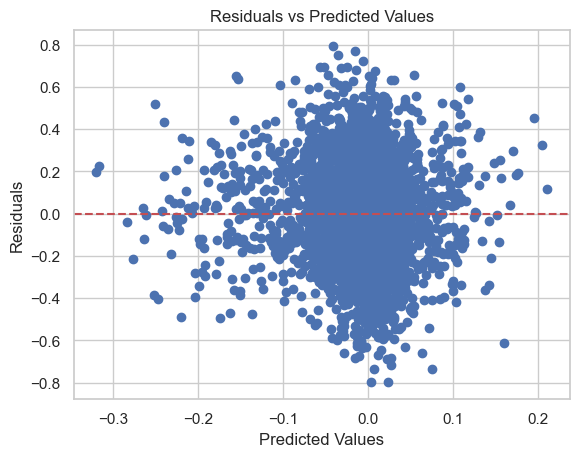

In [89]:
#residual analysis
residual = y_test - y_pred
plt.scatter(y_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

##### Train test analysis

In [90]:
#train test analysis

# Predict the target variable for the 2006-2008 period
y_train_pred = best_model.predict(X_train)

# Calculate Training Error (Mean Absolute Error and Mean Squared Errors
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Calculate Testing Error (Mean Absolute Error and Mean Squared Error)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

# Print the results
print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing RMSE: {test_rmse}')

Training MAE: 0.17017660033854495
Training RMSE: 0.21339286433187749
Testing MAE: 0.19446908330405155
Testing RMSE: 0.24274620352250387


### Feature importance

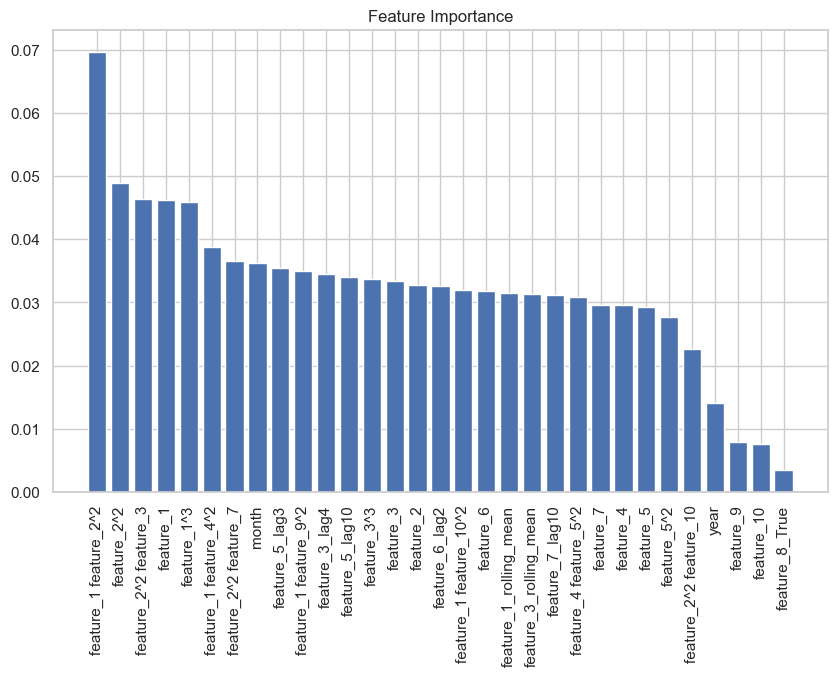

In [91]:

feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

## XG Boost

In [92]:
import xgboost as xgb

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=2)

# Fit the model using Grid Search
grid_search_xgb.fit(X_train, y_train)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [93]:
# Get the best parameters from Grid Search
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Parameters: {best_params_xgb}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}


In [94]:
# Train the best model on the entire training set
best_model_xgb = grid_search_xgb.best_estimator_

# Predict the target variable for the 2006-2008 period
y_pred_xgb = best_model_xgb.predict(X_test)

In [95]:
evaluate(y_test, y_pred_xgb)

R-squared (R²): 0.007149036318718549
Mean Absolute Error (MAE): 0.1966805508934634
Root Mean Squared Error (RMSE): 0.24607829943057613
Adjusted R-squared: -0.0020111957866744135
              Actual  Predicted
date                           
2006-01-31 -0.320581  -0.100235
2006-02-28 -0.200885  -0.050091
2006-04-28  0.029235   0.009243
2006-05-31  0.134612   0.018636
2006-06-30 -0.074951   0.012960
...              ...        ...
2008-08-29  0.043638  -0.025337
2008-09-30 -0.006345  -0.023554
2008-10-31  0.197838  -0.000724
2008-11-28 -0.035155   0.081288
2008-12-31 -0.261117  -0.115026

[3392 rows x 2 columns]


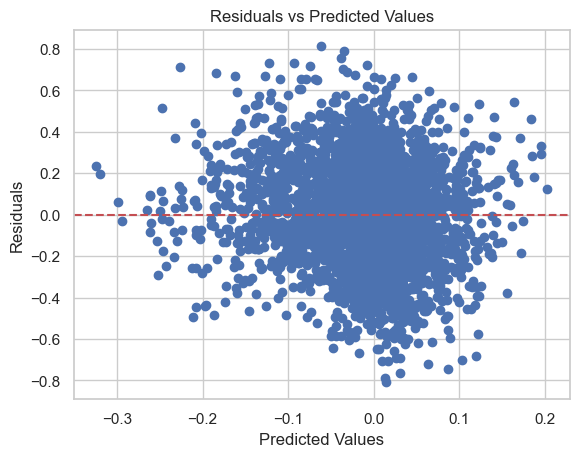

In [96]:
#residual analysis
residual_xgb = y_test - y_pred_xgb
plt.scatter(y_pred_xgb, residual_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [99]:
#train test analysis

y_train_pred_xgb = best_model_xgb.predict(X_train)

# Calculate Training Error (Mean Absolute Error and Mean Squared Errors
train_mae = mean_absolute_error(y_train, y_train_pred_xgb)
train_mse = mean_squared_error(y_train, y_train_pred_xgb)
train_rmse = np.sqrt(train_mse)

# Calculate Testing Error (Mean Absolute Error and Mean Squared Error)
test_mae = mean_absolute_error(y_test, y_pred_xgb)
test_mse = mean_squared_error(y_test, y_pred_xgb)
test_rmse = np.sqrt(test_mse)

# Print the results
print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing RMSE: {test_rmse}')

Training MAE: 0.17411243767478776
Training RMSE: 0.21887247964721826
Testing MAE: 0.1966805508934634
Testing RMSE: 0.24607829943057613


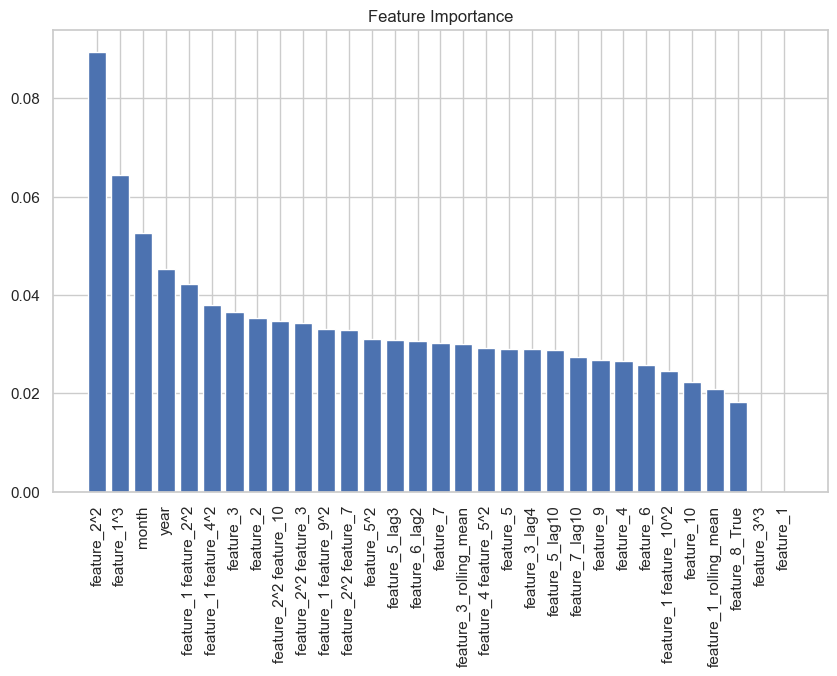

In [100]:
feature_importances_xgb = best_model_xgb.feature_importances_
sorted_indices = np.argsort(feature_importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances_xgb[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

## Residual Analysis of Random Forest

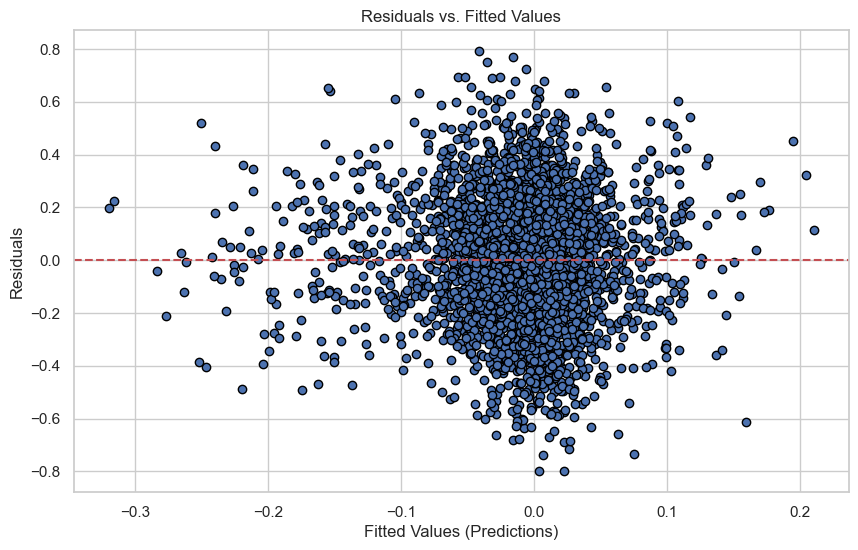

<Figure size 1000x600 with 0 Axes>

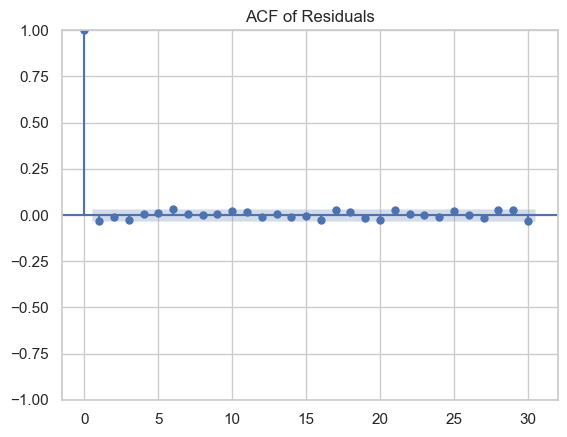

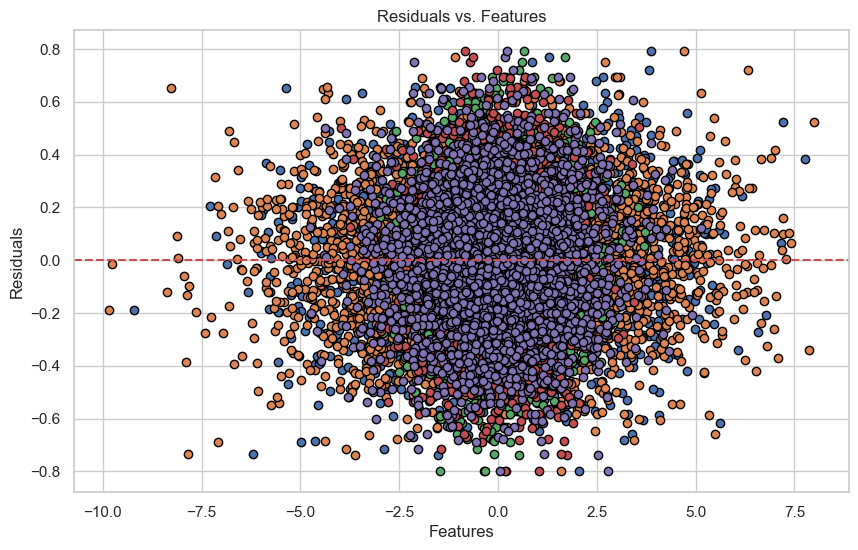

C:\Users\srava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


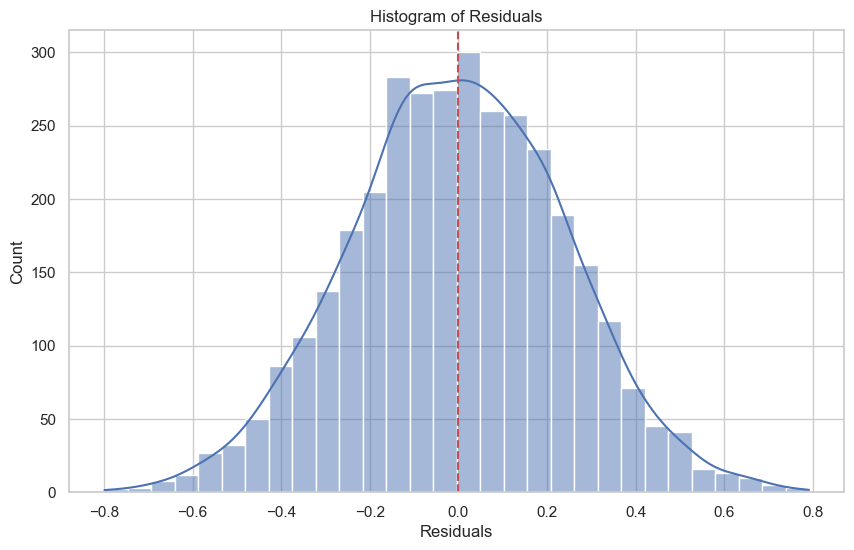

In [110]:
# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs. Fitted Values (Predicted Values)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# 2. Residual ACF (Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()

# 3. Residuals vs. Individual Regressors (for a sample feature, e.g., feature_1)
plt.figure(figsize=(10, 6))
plt.scatter(X_test.loc[:,'feature_1'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_3'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
# plt.scatter(X_test.loc[:,'feature_2'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_4'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_6'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
# plt.scatter(X_test.loc[:,'feature_5'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_7'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
# plt.scatter(X_test.loc[:,'feature_8_True'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
# plt.scatter(X_test.loc[:,'feature_9'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
# plt.scatter(X_test.loc[:,'feature_10'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Features')
plt.ylabel('Residuals')
plt.title('Residuals vs. Features')
plt.show()

# 4. Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


C:\Users\srava\AppData\Local\Temp\ipykernel_27604\2266524607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = df.groupby('binned').residuals.agg(['mean', 'var'])


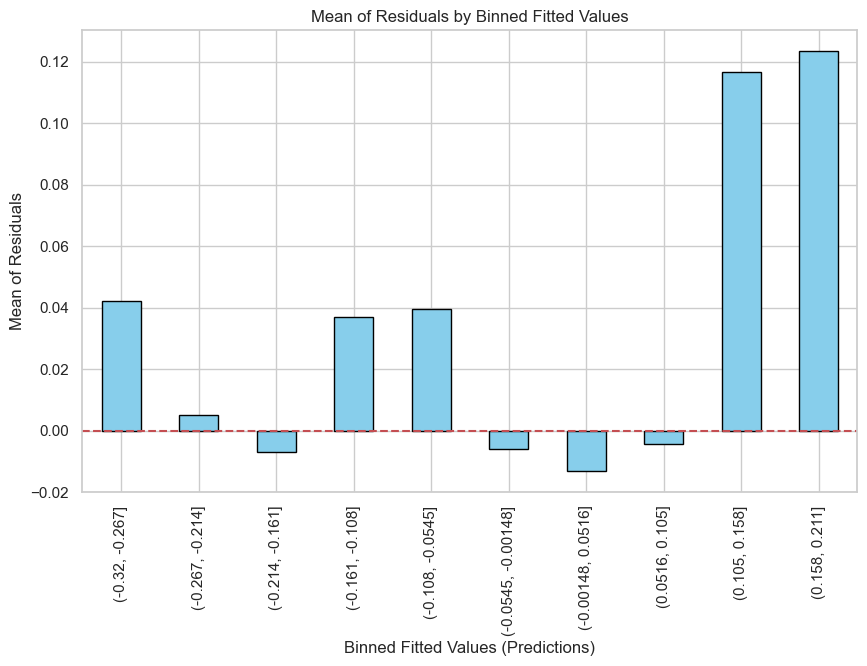

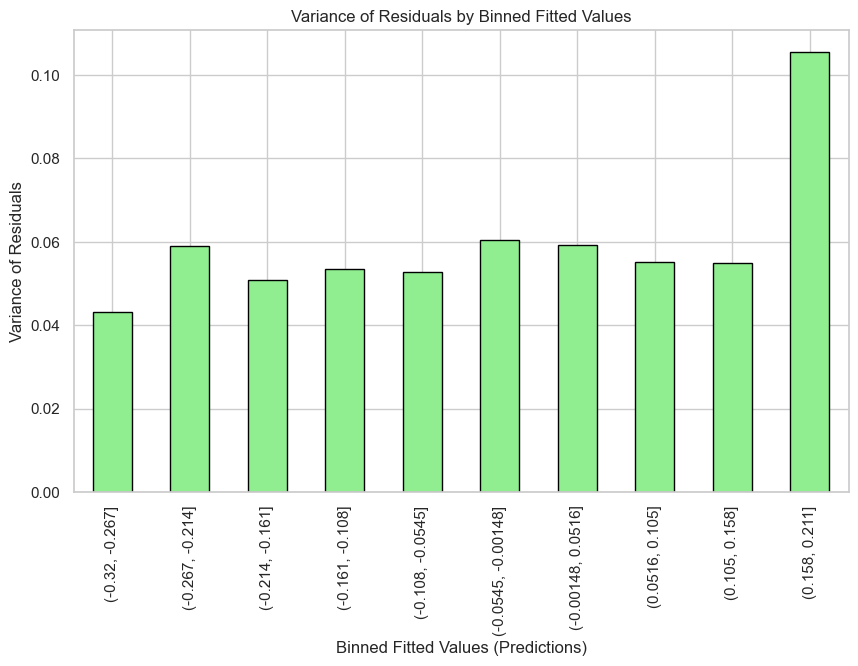

                         mean       var
binned                                 
(-0.32, -0.267]      0.042130  0.043150
(-0.267, -0.214]     0.005134  0.058966
(-0.214, -0.161]    -0.006850  0.050857
(-0.161, -0.108]     0.036912  0.053411
(-0.108, -0.0545]    0.039594  0.052846
(-0.0545, -0.00148] -0.005918  0.060328
(-0.00148, 0.0516]  -0.013178  0.059130
(0.0516, 0.105]     -0.004333  0.055094
(0.105, 0.158]       0.116773  0.055000
(0.158, 0.211]       0.123432  0.105440


In [102]:
num_bins = 10

# Create a DataFrame for easier manipulation
df = pd.DataFrame({
    'y_pred': y_pred,
    'residuals': residuals
})

# Create bins based on the predicted values (y_pred)
df['binned'] = pd.cut(df['y_pred'], bins=num_bins)

# Calculate mean and variance of residuals within each bin
binned_stats = df.groupby('binned').residuals.agg(['mean', 'var'])

# Plot mean of residuals in each bin
plt.figure(figsize=(10, 6))
binned_stats['mean'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Binned Fitted Values (Predictions)')
plt.ylabel('Mean of Residuals')
plt.title('Mean of Residuals by Binned Fitted Values')
plt.show()

# Plot variance of residuals in each bin
plt.figure(figsize=(10, 6))
binned_stats['var'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Binned Fitted Values (Predictions)')
plt.ylabel('Variance of Residuals')
plt.title('Variance of Residuals by Binned Fitted Values')
plt.show()

# Print out the mean and variance for inspection
print(binned_stats)

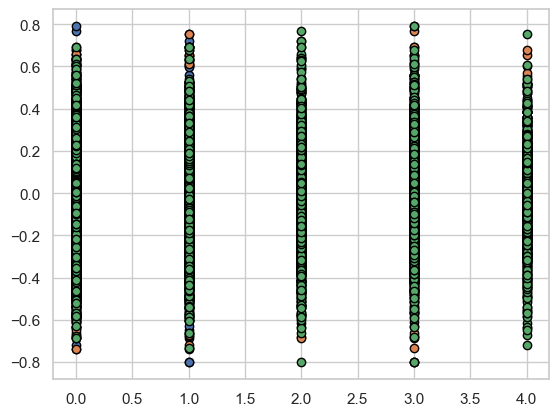

In [103]:
plt.scatter(X_test.loc[:,'feature_8_True'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_9'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column
plt.scatter(X_test.loc[:,'feature_10'], residuals, edgecolors=(0, 0, 0))  # Assuming feature_1 is the first column

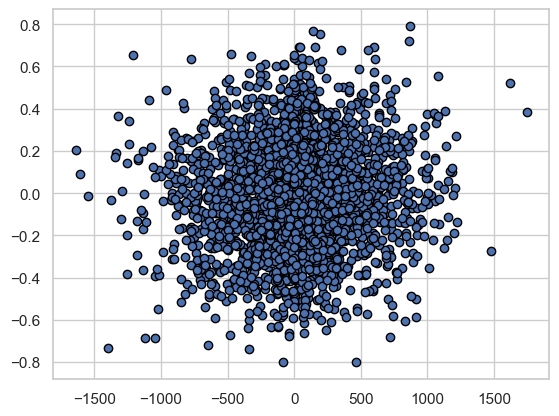

In [104]:
plt.scatter(X_test.loc[:,'feature_1 feature_2^2'], residuals, edgecolors=(0, 0, 0))  

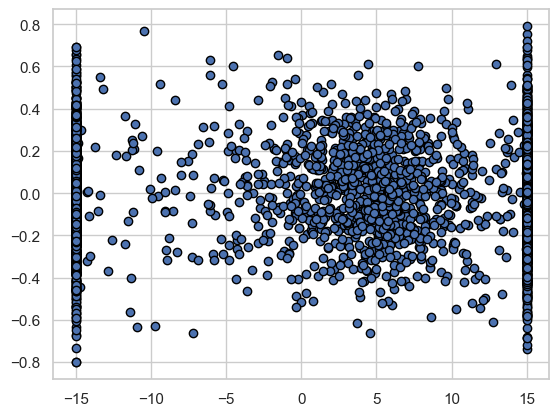

In [105]:
plt.scatter(X_test.loc[:,'feature_2'], residuals, edgecolors=(0, 0, 0))  

### Sector wise Perfomrance

In [106]:
X = data_n[features_with_original_ones + ['sector']].ffill().bfill()
y = data_n['target']

# Assume X contains relevant features; for simplicity, let's create a dummy feature set
X['month'] = X.index.month
X['year'] = X.index.year

# Split the data into training (before 2006) and testing (2006-2008) sets
X_train = X[X.index < '2006-01-01']
X_test = X[(X.index >= '2006-01-01') & (X.index <= '2008-12-31')]

y_train = y[y.index < '2006-01-01']
y_test = y[(y.index >= '2006-01-01') & (y.index <= '2008-12-31')]

In [107]:
# Predict the target variable for the 2006-2008 period
y_pred = best_model.predict(X_test.drop(columns = 'sector'))

# Create a DataFrame to hold actual, predicted, and sector information
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Sector': X_test['sector']})

# Function to calculate sector-wise performance metrics
def calculate_sector_wise_metrics(df):
    sector_metrics = df.groupby('Sector').apply(lambda x: pd.Series({
        'MAE': mean_absolute_error(x['Actual'], x['Predicted']),
        'RMSE': np.sqrt(mean_squared_error(x['Actual'], x['Predicted'])),
        'R-squared': r2_score(x['Actual'], x['Predicted']),
        'Adjusted R-squared': 1 - (1 - r2_score(x['Actual'], x['Predicted'])) * ((len(x) - 1) / (len(x) - X_test.shape[1] - 1))
    }))
    return sector_metrics

# Calculate the metrics
sector_wise_metrics = calculate_sector_wise_metrics(results)

# Display sector-wise performance metrics
sector_wise_metrics

C:\Users\srava\AppData\Local\Temp\ipykernel_27604\1125666160.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sector_metrics = df.groupby('Sector').apply(lambda x: pd.Series({


,MAE,RMSE,R-squared,Adjusted R-squared
Sector,,,,
Sector1,0.188285,0.236700,-0.024396,-0.160415
Sector10,0.209382,0.260731,-0.017494,-0.136325
Sector11,0.159968,0.204952,0.138910,0.029998
Sector2,0.215134,0.258617,0.084234,-0.013124
Sector3,0.204503,0.248311,0.096125,-0.007175
Sector4,0.168394,0.209946,-0.014573,-0.143408
Sector5,0.195559,0.245091,0.012322,-0.100154
Sector6,0.197359,0.244747,-0.108836,-0.232040
Sector7,0.219964,0.273926,0.004833,-0.111817


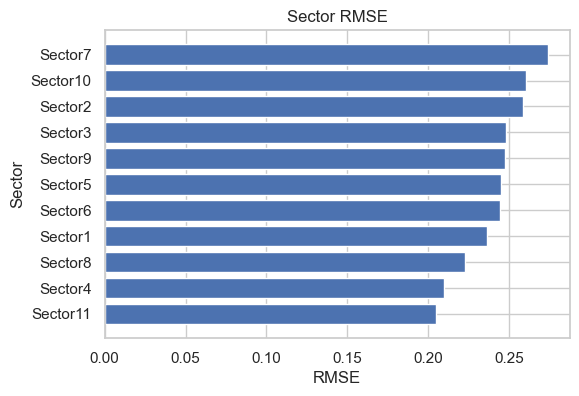

In [108]:
# Sort DataFrame by 'Importance' in descending order
sector_wise_metrics = sector_wise_metrics.sort_values(by='RMSE', ascending=False)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(sector_wise_metrics.index, sector_wise_metrics['RMSE'])
plt.xlabel('RMSE')
plt.ylabel('Sector')
plt.title('Sector RMSE')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

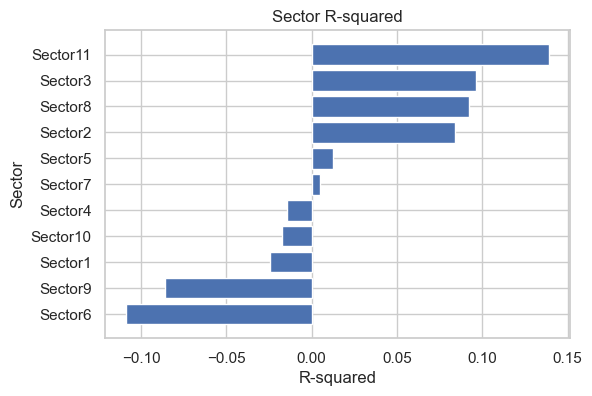

In [478]:
# Plot
sector_wise_metrics = sector_wise_metrics.sort_values(by='R-squared', ascending=False)
plt.figure(figsize=(6, 4))
plt.barh(sector_wise_metrics.index, sector_wise_metrics['R-squared'])
plt.xlabel('R-squared')
plt.ylabel('Sector')
plt.title('Sector R-squared')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

## Trading Strategy

In [438]:
X = data_n[features_with_original_ones+['identifier']].ffill().bfill()
y = data_n[['target','identifier','sector']]

# Assume X contains relevant features; for simplicity, let's create a dummy feature set
X['month'] = X.index.month
X['year'] = X.index.year

# Split the data into training (before 2006) and testing (2006-2008) sets
X_train = X[X.index < '2006-01-01']
X_test = X[(X.index >= '2006-01-01') & (X.index <= '2008-12-31')]

y_train = y[y.index < '2006-01-01']
y_test = y[(y.index >= '2006-01-01') & (y.index <= '2008-12-31')]

In [439]:
# Predict the target variable for the 2006-2008 period
y_pred = best_model.predict(X_test.drop(columns='identifier'))
evaluate(y_test['target'], y_pred)
# If you want to see the actual vs predicted values
predictions = pd.DataFrame({'Actual': y_test['target']/100, 'Predicted': y_pred/100,'Stock':y_test['identifier'], 'Sector': y_test['sector'] }).reset_index().rename(columns = {'date':'Date'})
predictions

R-squared (R²): 0.03385497752541311
Mean Absolute Error (MAE): 0.19446908330405155
Root Mean Squared Error (RMSE): 0.24274620352250387
Adjusted R-squared: 0.024650857037414764
              Actual  Predicted
date                           
2006-01-31 -0.320581  -0.042417
2006-02-28 -0.200885  -0.029213
2006-04-28  0.029235   0.008899
2006-05-31  0.134612   0.028830
2006-06-30 -0.074951   0.008192
...              ...        ...
2008-08-29  0.043638  -0.002696
2008-09-30 -0.006345  -0.012667
2008-10-31  0.197838  -0.019801
2008-11-28 -0.035155   0.060022
2008-12-31 -0.261117  -0.104374

[3392 rows x 2 columns]


,Date,Actual,Predicted,Stock,Sector
0,2006-01-31,-0.003206,-0.000424,1032941,Sector3
1,2006-02-28,-0.002009,-0.000292,1032941,Sector6
2,2006-04-28,0.000292,0.000089,1032941,Sector10
3,2006-05-31,0.001346,0.000288,1032941,Sector2
4,2006-06-30,-0.000750,0.000082,1032941,Sector1
...,...,...,...,...,...
3387,2008-08-29,0.000436,-0.000027,2962742,Sector9
3388,2008-09-30,-0.000063,-0.000127,2962742,Sector10
3389,2008-10-31,0.001978,-0.000198,2962742,Sector5
3390,2008-11-28,-0.000352,0.000600,2962742,Sector8


In [440]:
from scipy.optimize import minimize

# Assuming you have a DataFrame 'predictions' with columns ['Date', 'Stock', 'Sector', 'Actual', 'Predicted']
# Ensure 'Date' is a datetime object for correct filtering



# Define the rolling window period (3 months for quarterly returns)
window_period = 3

# Loop through each unique month
monthly_periods = predictions['Date'].dt.to_period('M').unique()


In [441]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [442]:
# Initialize an empty DataFrame to store the results
optimized_portfolio_l = []
pd.options.mode.chained_assignment = None
for date in monthly_periods:
    # Get the three-month period ending at the current date
    start_date = (date - 2).start_time.date()
    end_date = date.end_time.date()
    
    end_m = date
    start_m = (date - 2)
    
    # Filter data for the current three-month period
    predictions['YYMM'] = pd.to_datetime(predictions['Date']).dt.to_period('M')
    quarterly_data = predictions[(predictions['YYMM'] >= start_m) & (predictions['YYMM'] <= end_m)].copy()

    # Step 1: Generate signals and select long and short stocks based on the latest month
    latest_month_data = quarterly_data[quarterly_data['YYMM'] == end_m]
    top_threshold = latest_month_data['Predicted'].quantile(0.95)
    bottom_threshold = latest_month_data['Predicted'].quantile(0.05)

    latest_month_data.loc[:,'Position'] = 0
    latest_month_data.loc[latest_month_data['Predicted'] >= top_threshold, 'Position'] = 1  # Long
    latest_month_data.loc[latest_month_data['Predicted'] <= bottom_threshold, 'Position'] = -1  # Short

    # Separate long and short positions
    long_stocks = latest_month_data.loc[latest_month_data['Position'] == 1,:]
    short_stocks = latest_month_data.loc[latest_month_data['Position'] == -1,:]
    
    if latest_month_data.empty:
        print(end_date,start_date)
        print(quarterly_data)
        
    # # If not enough data for three months, skip
    # if quarterly_data.empty or len(quarterly_data['Date'].unique()) < window_period:
    long_initial_guess = np.ones(len(long_stocks)) / len(long_stocks)
    long_optimized_weights = long_initial_guess
    short_initial_guess = np.ones(len(short_stocks)) / len(short_stocks)
    short_optimized_weights = short_initial_guess

#     else:
#         # Step 2: Calculate quarterly returns and covariances for the optimization
#         returns = quarterly_data.pivot(index='Date', columns='Stock', values='Actual').dropna()
#         if returns.shape[1] < 2:  # Skip if there's not enough data to optimize
#             continue

#         expected_returns = returns.mean()
#         cov_matrix = returns.cov()

#         # Define objective function for mean-variance optimization
#         def objective(weights, expected_returns, cov_matrix):
#             return -1 * (np.dot(weights, expected_returns) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))))

#         # Constraints for long positions: sum of long weights = 1
#         long_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
#         long_bounds = [(0, 1)] * len(long_stocks)

#         # Initial guess (equal weight) for long positions
#         long_initial_guess = np.ones(len(long_stocks)) / len(long_stocks)

#         # Optimize the long positions
#         long_opt_result = minimize(objective, long_initial_guess, args=(expected_returns[long_stocks['Stock']], cov_matrix.loc[long_stocks['Stock'], long_stocks['Stock']]), bounds=long_bounds, constraints=long_constraints)
#         long_optimized_weights = long_opt_result.x

#         # Constraints for short positions: sum of short weights = 1
#         short_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
#         short_bounds = [(0, 1)] * len(short_stocks)

#         # Initial guess (equal weight) for short positions
#         short_initial_guess = np.ones(len(short_stocks)) / len(short_stocks)

#         # Optimize the short positions
#         short_opt_result = minimize(objective, short_initial_guess, args=(expected_returns[short_stocks['Stock']], cov_matrix.loc[short_stocks['Stock'], short_stocks['Stock']]), bounds=short_bounds, constraints=short_constraints)
#         short_optimized_weights = short_opt_result.x

    # Apply the optimized weights to the long and short positions
    latest_month_data.loc[latest_month_data['Position'] == 1, 'Optimized_Position'] = long_optimized_weights
    latest_month_data.loc[latest_month_data['Position'] == -1, 'Optimized_Position'] = -short_optimized_weights
    latest_month_data['Optimized_Position'].fillna(0.0, inplace=True)

    # Calculate daily returns of the optimized portfolio
    latest_month_data['Daily_Return'] = latest_month_data['Optimized_Position'] * latest_month_data['Actual']
    
    # Append results for this month to the overall DataFrame
    optimized_portfolio_l.append(latest_month_data)

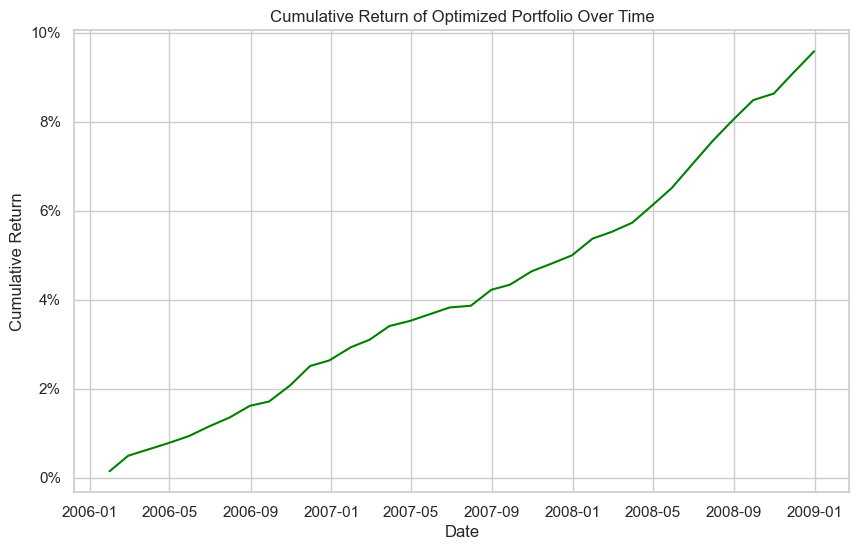

In [443]:
# Step 4: Calculate the cumulative PnL over time
import matplotlib.ticker as mtick
optimized_portfolio = pd.concat(optimized_portfolio_l,axis=0)
monthly_ret_all_stocks = optimized_portfolio.groupby('Date')['Daily_Return'].sum()

# Plot the cumulative PnL over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_ret_all_stocks.index, (1 + monthly_ret_all_stocks).cumprod() - 1 , color='green')
plt.title('Cumulative Return of Optimized Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
plt.grid(True)
plt.show()

In [444]:
# 1. Calculate Annualized Return
annualized_return = (1 + monthly_ret_all_stocks).cumprod()[-1]**(12/len(monthly_ret_all_stocks)) - 1

# 2. Calculate Sharpe Ratio
# Assuming a risk-free rate of 0 (you can adjust this value)
risk_free_rate = 0
excess_return = monthly_ret_all_stocks - risk_free_rate
annualized_std_dev = monthly_ret_all_stocks.std() * np.sqrt(12)
sharpe_ratio = annualized_return / annualized_std_dev

# 3. Calculate Maximum Drawdown
cumulative_returns = (1 + monthly_ret_all_stocks).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

# Print the results
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
print(f'Maximum Drawdown: {max_drawdown:.2%}')

Annualized Return: 3.28%
Sharpe Ratio: 7.38
Maximum Drawdown: 0.00%


#### Sector wise perfromance attribution of trading strategy

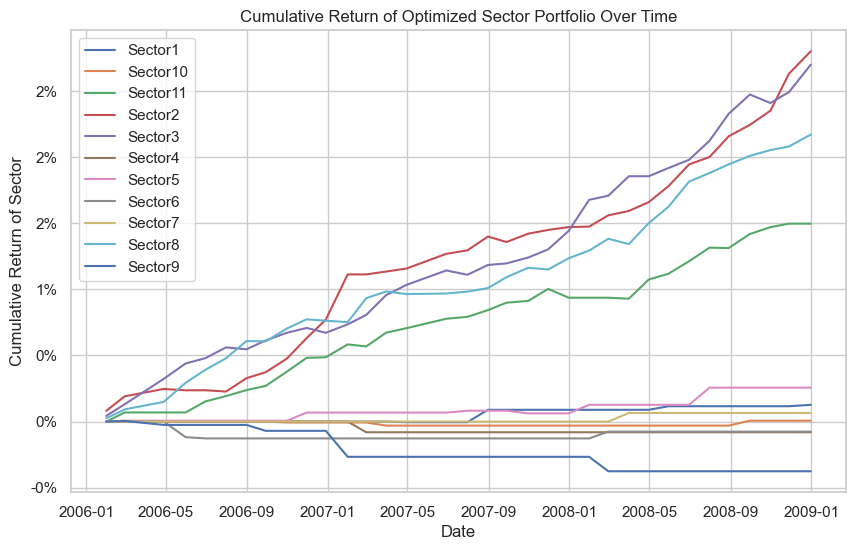

In [463]:
# Step 4: Calculate the cumulative PnL over time
import matplotlib.ticker as mtick
optimized_portfolio = pd.concat(optimized_portfolio_l,axis=0)
sector_ret_all_stocks = optimized_portfolio.groupby(['Date','Sector'])['Daily_Return'].sum()

# Pivot the DataFrame
pivoted_df = sector_ret_all_stocks.reset_index().pivot(index='Date', columns='Sector', values='Daily_Return')

plt.figure(figsize=(10, 6))
# Calculate cumulative returns and plot each sector
cumulative_returns = (1 + pivoted_df).cumprod() - 1
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title('Cumulative Return of Optimized Sector Portfolio Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return of Sector')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
plt.grid(True)
plt.legend()
plt.show()